In [109]:
reads ='/home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/03_filtering/reads12.tsv'

In [2]:
! head -n 150 $reads
# read ID        Chromosome1 pos1  strand1  length1 RE_left1 RE_right1 Chromosome2 pos2 strand2 length2 RE_left2 RE_right2

# CRM chr1	4042929
SRR824843.3014662	chr1	1	1	40	1	15389	chr1	330	0	40	1	15389
SRR824843.4002508	chr1	1	1	40	1	15389	chr1	330	0	40	1	15389
SRR824843.8338706	chr1	100	0	40	1	15389	chr1	15455	0	40	15389	19394
SRR824843.15318794	chr1	100	0	40	1	15389	chr1	171654	1	40	169656	171721
SRR824843.15348487	chr1	100	0	40	1	15389	chr1	171654	1	40	169656	171721
SRR824843.8498747	chr1	100	0	40	1	15389	chr1	1982855	1	40	1975770	1983059
SRR824843.11299089#2/3	chr1	100	0	40	1	15389	chr1	28532	0	21	28513	32206
SRR824843.6497376#2/3	chr1	100	0	40	1	15389	chr1	28532	0	21	28513	32206
SRR824843.10694350	chr1	100	0	40	1	15389	chr1	286947	0	40	286833	291587
SRR824843.3987019	chr1	100	0	40	1	15389	chr1	286947	0	40	286833	291587
SRR824843.11060915	chr1	100	0	40	1	15389	chr1	33278	1	40	32206	33384
SRR824843.9583439	chr1	100	0	40	1	15389	chr1	33278	1	40	32206	33384
SRR824843.10385482	chr1	100	0	40	1	15389	chr1	3407508	1	40	3402832	3407563
SRR824843.12041103	chr1	100	0	40	1	15389	chr1	35990	1	40	33384	36085
SRR824

In [4]:
fh = open(reads)
fh.next()
dico ={}
for line in fh:
    _, c1, p1, s1, l1, rel1, rer1, c2, p2, s2, l2, rel2, rer2 = line.split()
    
    try:
        dico[(rel1, rer1)][(rel2, rer2)] += 1
    except KeyError:
        try:
            dico[(rel1, rer1)][(rel2, rer2)] = 1
        except KeyError:
            dico[(rel1, rer1)] = dict()
            dico[(rel1, rer1)][(rel2, rer2)] = 1
    try:
        dico[(rel2, rer2)][(rel1, rer1)] += 1
    except KeyError:
        try:
            dico[(rel2, rer2)][(rel1, rer1)] = 1
        except KeyError:
            dico[(rel2, rer2)] = dict()
            dico[(rel2, rer2)][(rel1, rer1)] = 1            

In [ ]:
fh = open(reads)
fh.next()
dico ={}
for line in fh:
    _, c1, p1, s1, l1, rel1, rer1, c2, p2, s2, l2, rel2, rer2 = line.split()
    if (rel1, rer1) in dico:
        if (rel2, rer2) in dico [(rel1, rer1)]:
            dico[(rel1, rer1)][(rel2, rer2)] += 1
        else:
            dico[(rel1, rer1)][(rel2, rer2)] = 1
    else:
        dico[(rel1, rer1)] = dict()
        dico[(rel1, rer1)][(rel2, rer2)] = 1
        
    try:
        dico[(rel2, rer2)][(rel1, rer1)] += 1
    except KeyError:
        try:
            dico[(rel2, rer2)][(rel1, rer1)] = 1
        except KeyError:
            dico[(rel2, rer2)] = dict()
            dico[(rel2, rer2)][(rel1, rer1)] = 1            

In [ ]:
sorted(dico[('1', '15389')].items(), key=lambda x: x[1], reverse=True)

In [ ]:
sorted(dico[('15389', '19394')].items(), key=lambda x: x[1], reverse=True)

In [ ]:
sorted(dico[('19394', '23999')].items(), key=lambda x: x[1], reverse=True)

In [ ]:
import collections
od = collections.OrderedDict(sorted(dico.items()))

In [ ]:
ap = []
for rel1, rer1 in dico:
        first, second, third = sorted(dico[(rel1, rer1)], key=lambda x:dico[(rel1, rer1)][x], reverse=True)[:3]
        ap = list(first) + list(second) + list(third)
        even_pos = (ap[0], ap[2], ap[4])
        odd_pos = (ap[1], ap[3], ap[5])
        
        print ap

In [ ]:
ap = []
for rel1, rer1 in dico:
        first, second, third, forth, fifth, six, seven, eight, nine, ten = sorted(dico[(rel1, rer1)], key=lambda x:dico[(rel1, rer1)][x], reverse=True)[:10]
        ap = list(first) + list(second) + list(third) + list(forth) + list(six) + list(seven) + list(eight) + list(nine) + list(ten)
        
        even_pos = (ap[0], ap[2], ap[4], ap[6], ap[8])
        odd_pos = (ap[1], ap[3], ap[5], ap[7], ap[9])

        import collections
        x = [item for item, count in collections.Counter(ap).items() if count > 1]

        if not x: 
            print ap
        else:
            counter1 = 0
            counter2 = 0
            for i in x:
                if i in even_pos:
                    counter1 = 1
                if i in odd_pos:
                    counter2 = 1
                if counter1 == 1 & counter2 == 1:
                    continue
                else:
                    print ap

In [ ]:
import collections
ap = []

for rel1, rer1 in dico:
        first, second, third, forth = sorted(dico[(rel1, rer1)], key=lambda x:dico[(rel1, rer1)][x], reverse=True)[:4]
        ap = list(first) + list(second) + list(third) + list(forth)
    
        even_pos = (ap[0], ap[2], ap[4], ap[6])
        odd_pos = (ap[1], ap[3], ap[5], ap[7])

        
        x = [item for item, count in collections.Counter(ap).items() if count > 1]

        
        if not x: 
            print ap
        else:
            counter1 = 0
            counter2 = 0
            for i in x:
                if i in even_pos:
                    counter1 = 1
                if i in odd_pos:
                    counter2 = 1
                if counter1 == 1 & counter2 == 1:
                    continue
                else:
                    print ap

In [ ]:
len(dico)

In [5]:
matrix = [[0 for _ in range(len(dico))] for _ in range(len(dico))]
for i, k1 in enumerate(sorted(dico, key=lambda x: int(x[0]))):
    for j, k2 in enumerate(sorted(dico, key=lambda x: int(x[0]))):
        val = dico[k1].get(k2, 0)
        matrix[i][j] = val


In [6]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
plt.figure(figsize=(14, 14))
plt.imshow(np.log(matrix))

In [ ]:
plt.show()

In [ ]:

ap = []

for rel1, rer1 in dico:
        ap = sorted(dico[(rel1, rer1)], key=lambda x:dico[(rel1, rer1)][x], reverse=True)[:3]
        
        
         # find the identical
for k2 in ap:
            if i in k2 == (rel1, rer1):
         
            
    


In [212]:
self

('1268989', '1271426')

In [107]:
nonfrag = 0
allfrag = 0

for rel1, rer1 in dico:
    ap = sorted(dico[(rel1, rer1)], key=lambda x:dico[(rel1, rer1)][x], reverse=True)[:3]
    # find the identical
    left = None
    right = None
    selfrag = None
    for rel2, rer2 in ap:
        if (rel2, rer2) == (rel1, rer1):
            selfrag = (rel2, rer2)
        elif rel1 == rer2: 
            left = (rel2, rer2)
        elif rel2 == rer1:
            right = (rel2, rer2)
    allfrag += 1
    if left == None or right == None:
        nonfrag += 1
#        if sum(dico[rel1, rer1][k2] for k2 in dico[rel1, rer1]) > 10000:
#             print (' =>', left, right, selfrag,  (rel1, rer1), len(dico[(rel1, rer1)]), 
#                    sum(dico[rel1, rer1][k2] for k2 in dico[rel1, rer1]))
        continue
    try:
         val = dico[left][right]
    except KeyError:
         val = 0 
    if val < 400:
        print left, right, val, selfrag, len(dico[(rel1, rer1)])
print nonfrag, allfrag

NameError: name 'dico' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = []

plt.xlabel("position relative to the measured fragment side ")
plt.ylabel("log")
plt.title("Interactions")

dim = len(data[])


plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')

         








plt.show()


# ZZz

In [110]:
from pytadbit.parsers.hic_parser import load_hic_data_from_reads

In [111]:
reso=10000


In [112]:
hic_data = load_hic_data_from_reads(reads,  reso)

In [113]:
matrix = hic_data.get_matrix(focus=None, diagonal=True, normalized=False)

## plt.imshow(np.log(matrix))

In [114]:
len(matrix[0])

405

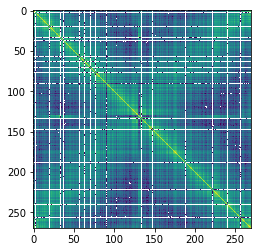

In [350]:
plt.show()

In [3]:
m = [[0 for _ in range(10)] for _ in range(10)]

In [26]:
type(m)
m

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5]

In [715]:
from random import random

In [718]:
random()

0.6479131167941067

[[6, 3, 6, 5, 4, 7, 2, 7, 1, 2], [7, 1, 3, 3, 6, 7, 1, 2, 2, 2], [2, 6, 5, 5, 1, 1, 1, 1, 4, 3], [1, 5, 5, 7, 10, 1, 6, 5, 1, 3], [2, 1, 7, 4, 1, 1, 4, 7, 7, 2], [4, 5, 1, 4, 6, 1, 3, 5, 6, 4], [1, 7, 1, 1, 7, 1, 1, 1, 1, 2], [2, 1, 6, 7, 1, 1, 1, 4, 6, 3], [4, 7, 2, 2, 2, 6, 4, 7, 6, 5], [7, 1, 3, 4, 7, 1, 6, 5, 6, 1]]


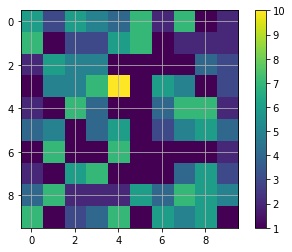

In [729]:
m = [[int(random()*8) for _ in range(10)] for _ in range(10)]

i = 3
j = 4

m[i][j]=10

for y in range(len(m)):
    for x in range(len(m)):
        z = m[y][x]
        if z != 0:
            for k in range(len(m)):
                if m[y][k] == 0:
                    m[y][k]=1
            
            

print (m)
plt.imshow(m)
plt.colorbar()
plt.grid()
plt.show()

###################
plt.figure(figsize=(12, 18))
for i in range(len(m)):
    dist = []
    for d in range(0, 11):
        if 4 - d > 0 and 4 + d < len(m):
            summ = m[i][4-d] + m[i][4+d] 
        elif 4 + d < len(m):
            summ = 0         + m[i][4+d]
        else:
            summ = m[i][4-d] + 0 
        
        # print summ
        dist.append(summ)
    plt.subplot(10, 1, i + 1)
    plt.plot(range(0, 11), dist, alpha=1)
##################
    

In [766]:
%matplotlib inline

0 0
lol lol lol lol lol lol lol lol lol 
1 1
eco lol lol lol lol lol lol lol pop 
2 2
eco eco lol lol lol lol lol pop pop 
3 3
eco eco eco lol lol lol pop pop pop 
4 4
eco eco eco eco lol pop pop pop pop 
5 5
eco eco eco eco end pop pop pop pop 
6 6
eco eco eco end end end pop pop pop 
7 7
eco eco end end end end end pop pop 
8 8
eco end end end end end end end pop 
9 9
end end end end end end end end end 


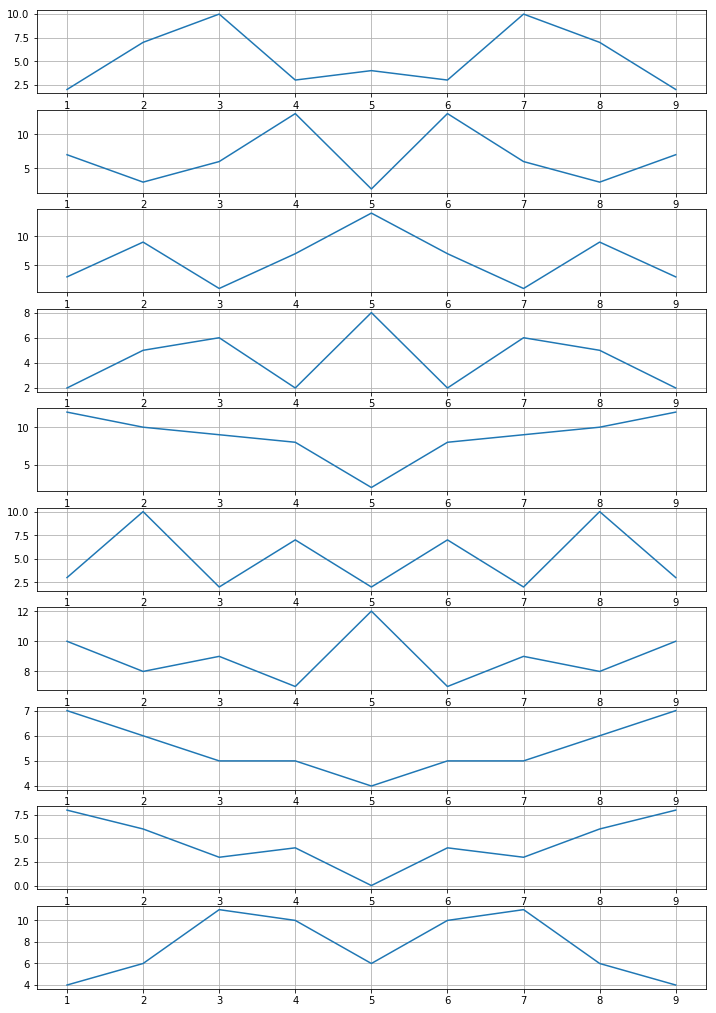

[4, 0, 7, 5, 0, 2, 3, 5, 0, 2]
[4, 5, 3, 2, 0, 6, 1, 7, 6, 1]
[4, 2, 0, 1, 5, 1, 0, 7, 7, 0]
[5, 4, 2, 5, 0, 1, 1, 1, 4, 1]
[2, 7, 4, 6, 0, 6, 6, 2, 6, 1]
[1, 4, 1, 6, 0, 2, 3, 4, 1, 3]
[5, 6, 2, 3, 2, 3, 2, 7, 6, 6]
[5, 4, 2, 1, 0, 1, 4, 3, 3, 5]
[6, 0, 1, 0, 3, 3, 0, 5, 3, 3]
[0, 0, 6, 4, 3, 6, 5, 6, 4, 2]


In [102]:
from random import random
import matplotlib.pyplot as plt

m = [[int(random()*8) for _ in range(10)] for _ in range(10)]


plt.figure(figsize=(12, 18))
k = 0 
for i in range(len(m)):
    dist = []
    for d in range(1, 10):
        if k - d >= 0 and k    + d < len(m):     # left is inside and right is inside 
            summ = m[i][k-d]   + m[i][k+d] 
            print 'eco',
        elif k + d < len(m):                     # right is inside (left outside)
            summ = m[i][k-d]   + m[i][k+d] 
            print "lol",
        elif k - d >= 0:                         # right is outside (left inside)
            summ = m[i][k-d]   + m[i][k+d-len(m)]
            print "end",
           
        else:                                    # left and right are outside
            summ = m[i][k-d] + m[i][k+d-len(m)]
            print "pop",
        # print summ\
        dist.append(summ)
    k = k + 1 
    print ""
    plt.subplot(10, 1, i + 1)
    plt.plot(range(1, 10), dist, alpha=1)
    plt.grid()
plt.show()
for p in m:
    print p

In [24]:
m[0][0-1]+m[0][0+1]

 #for x in reversed(m[i]):
            #   a_list.append(x)
            #summ = a_list[d-k] + m[i][d+k]                     
            #summ = m[i][::-(d-k)]

7

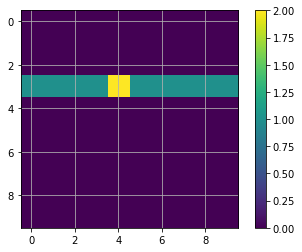

In [708]:
plt.imshow(m)
plt.colorbar()
plt.grid()
plt.show()

matrix

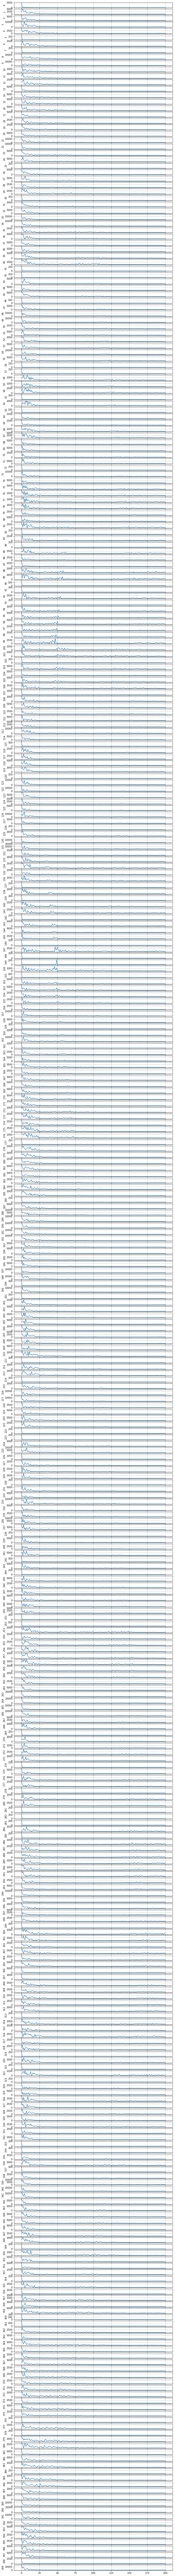

In [115]:
nrows = 400

plt.figure(figsize=(12, 200))
for k in xrange(nrows):
    dist = []
    for d in xrange(1, len(matrix)/2):
        if k - d >= 0 and k    + d < len(matrix):    
            summ = matrix[k][k-d]   + matrix[k][k+d] 
        elif k + d < len(matrix):                     
            summ = matrix[k][k-d]   + matrix[k][k+d] 
        elif k - d >= 0:                         
            summ = matrix[k][k-d]   + matrix[k][k+d-len(matrix)]
        else:                                   
            summ = matrix[k][k-d] + matrix[k][k+d-len(matrix)]
                           
        
        dist.append(summ)
    plt.subplot(nrows, 1, k + 1)
    plt.plot(dist, alpha=1)
    plt.grid()
    plt.ylabel(k)
plt.show()






In [104]:
plt.figure(figsize=(40,40))
plt.imshow(np.log2(matrix), interpolation='none', origin='lower()')
plt.savefig('matrix_caulo_10kb.pdf', format='pdf')

/home/nikita/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app


In [105]:
pwd

u'/home/nikita/Notebook'

In [693]:
for i in range(len(matrix)):
    plt.figure() 
    plt.plot(matrix[i])
    

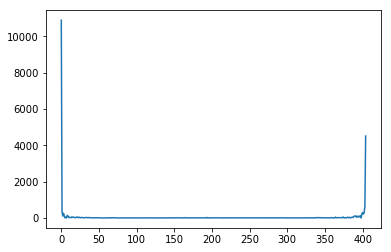

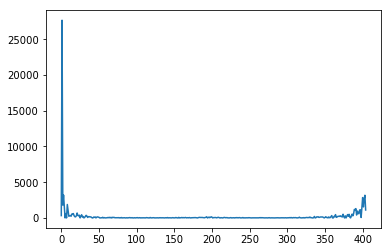

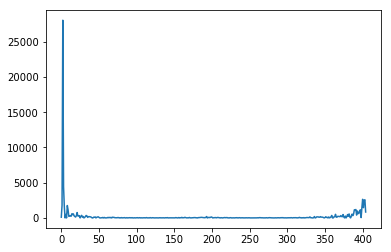

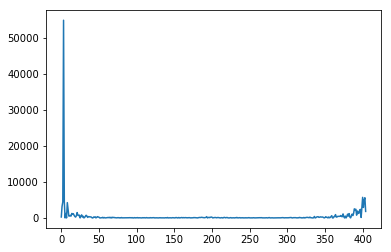

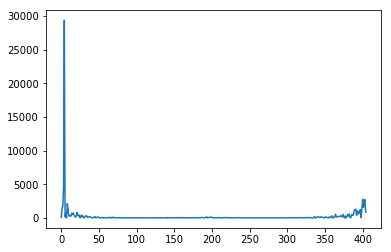

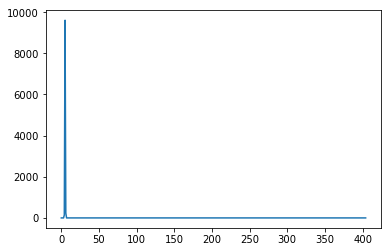

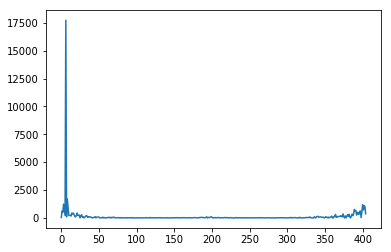

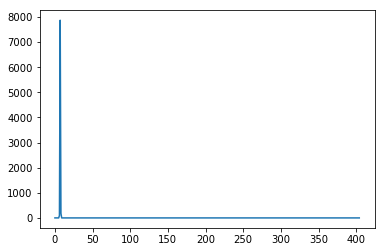

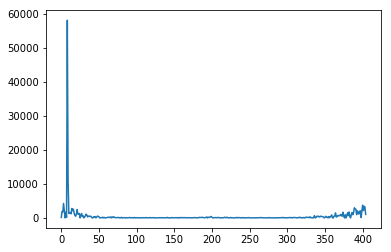

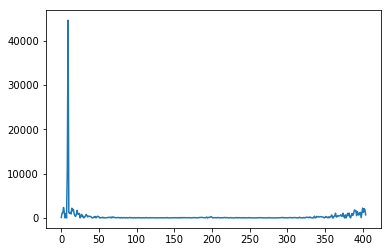

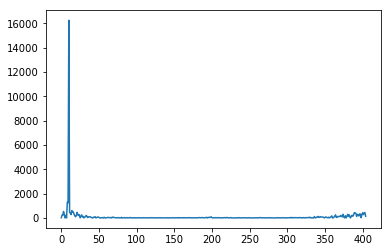

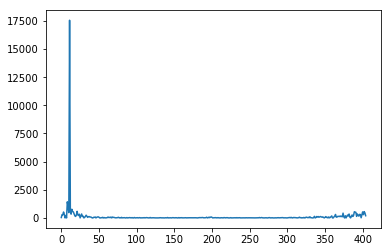

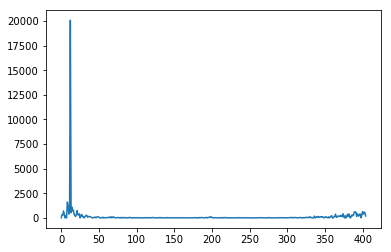

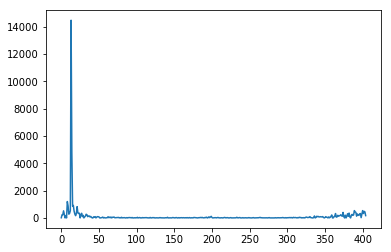

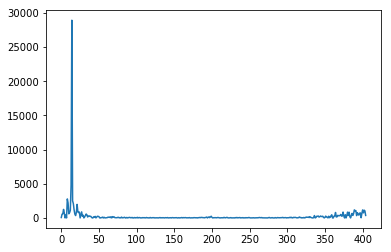

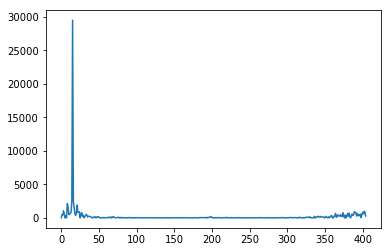

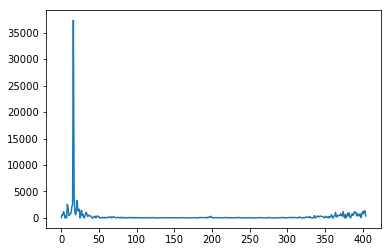

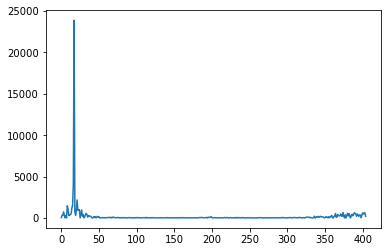

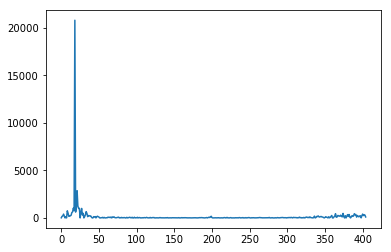

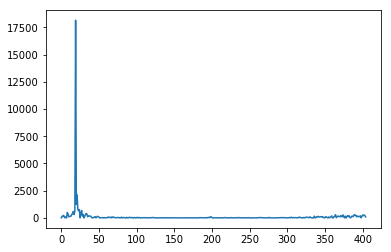

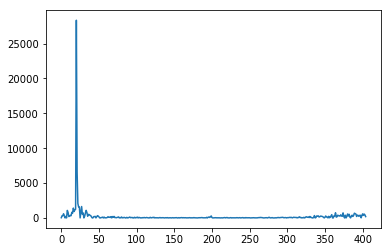

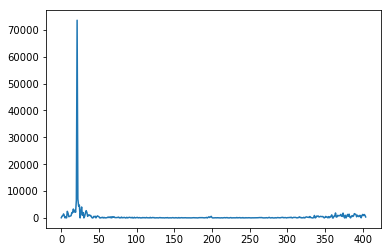

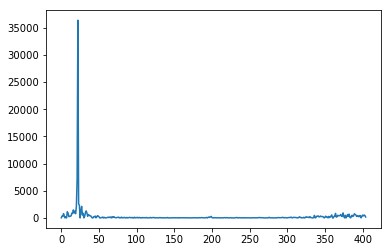

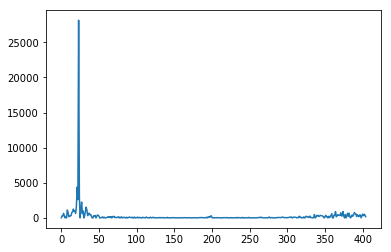

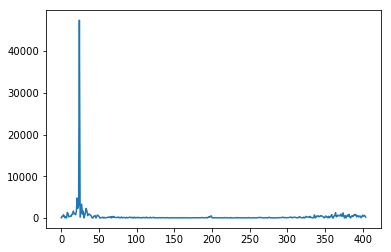

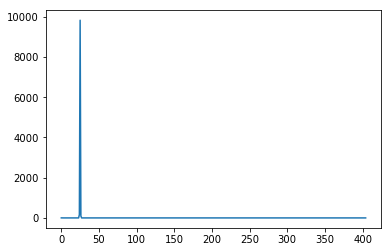

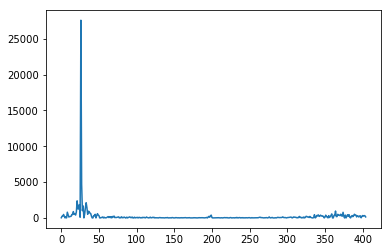

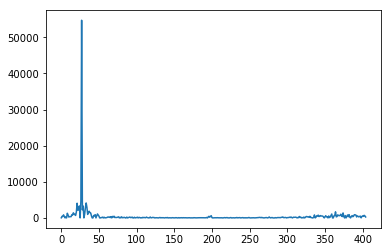

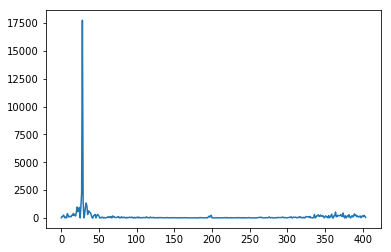

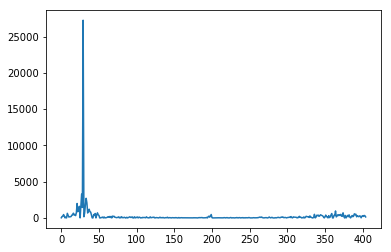

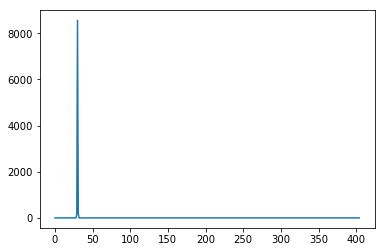

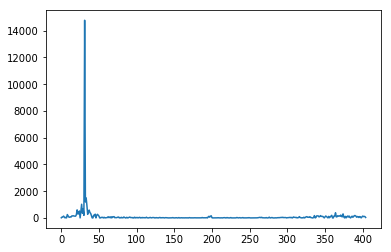

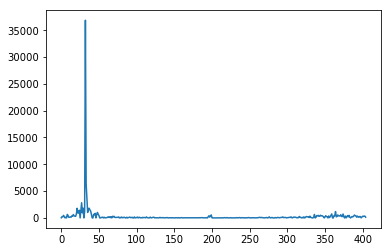

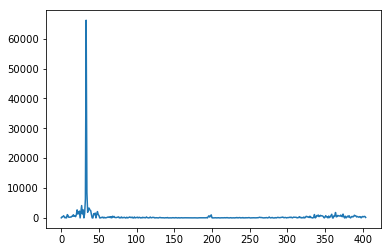

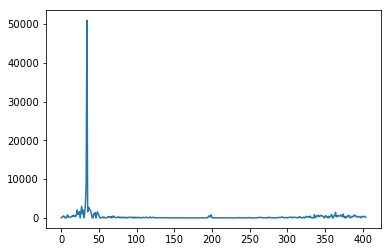

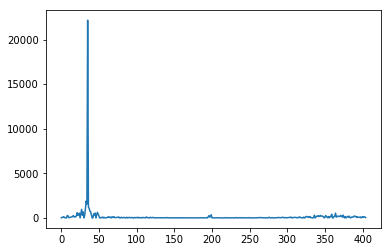

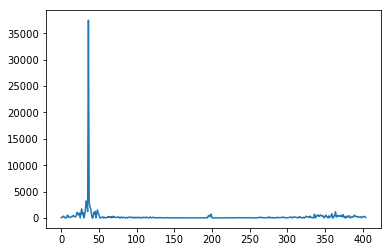

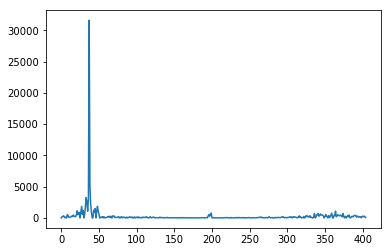

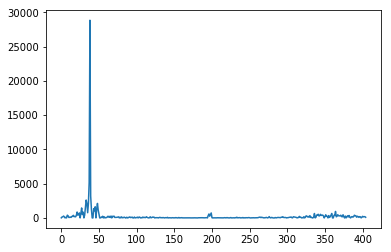

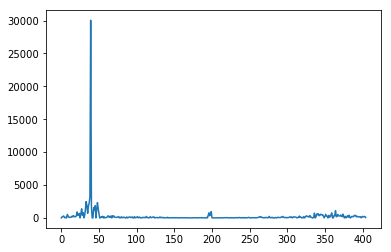

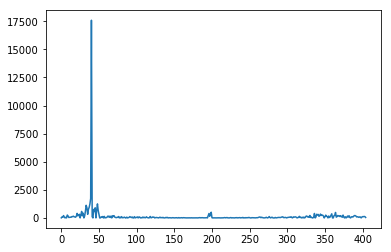

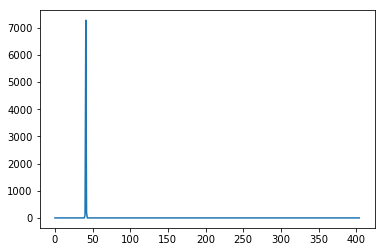

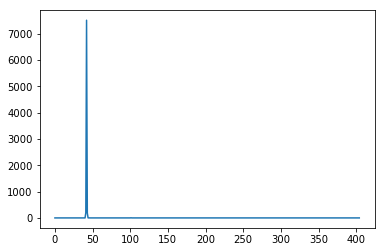

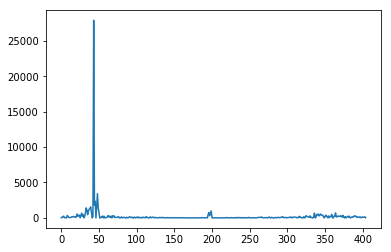

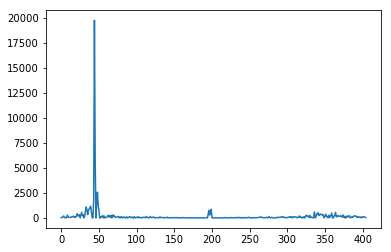

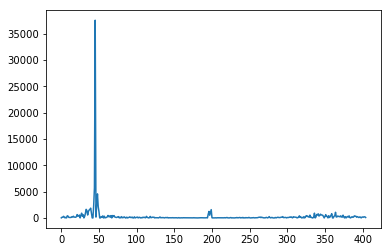

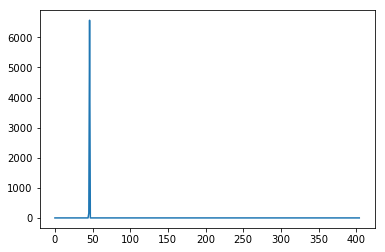

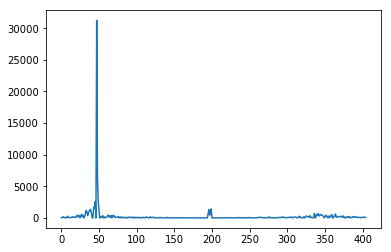

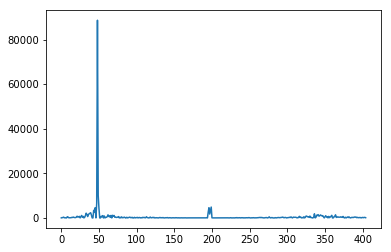

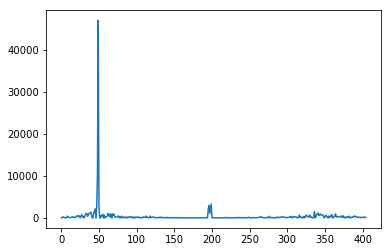

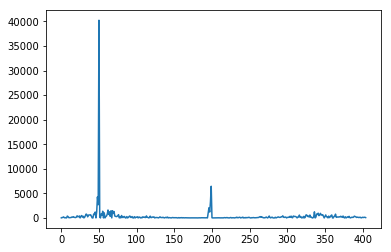

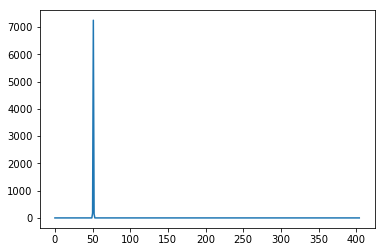

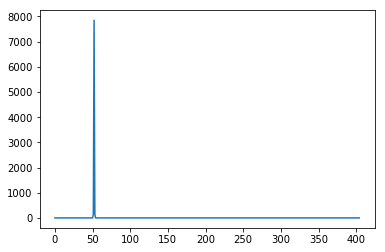

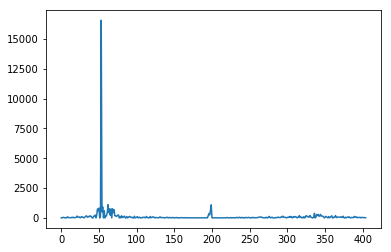

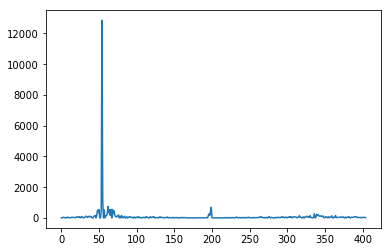

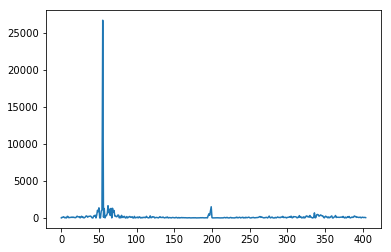

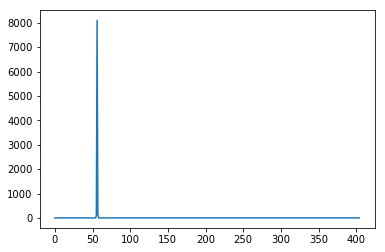

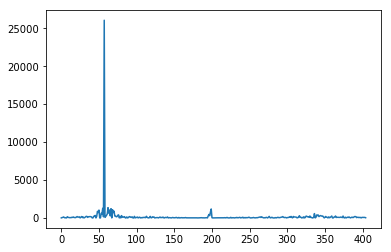

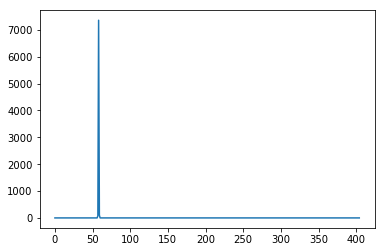

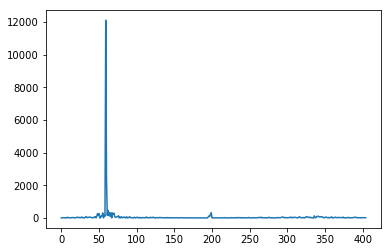

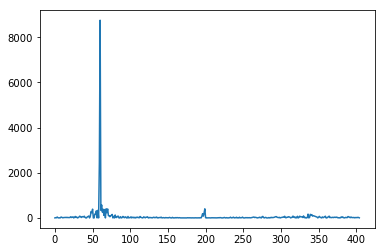

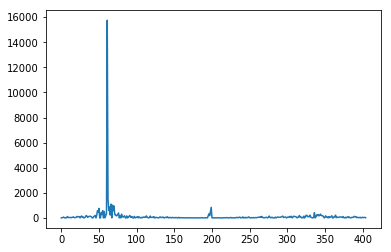

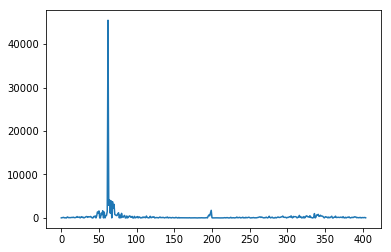

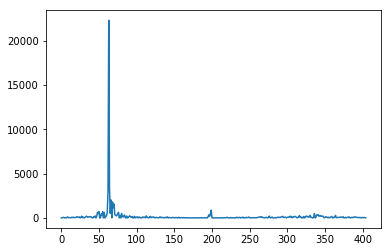

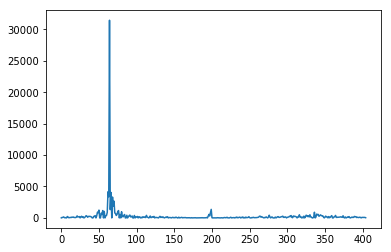

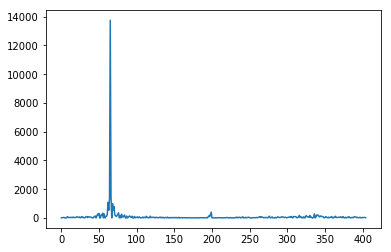

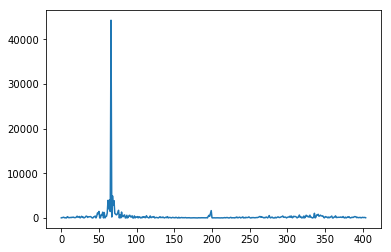

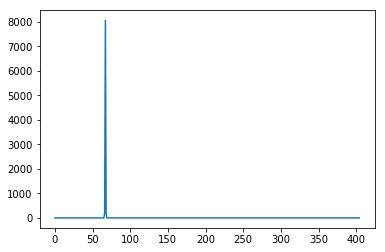

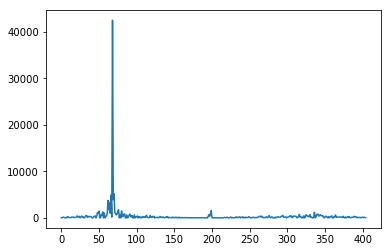

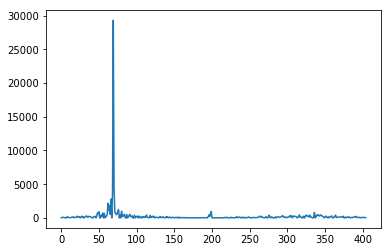

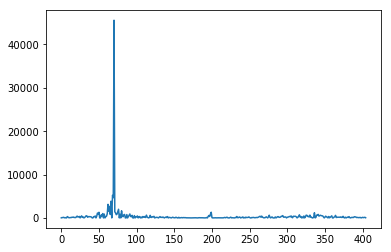

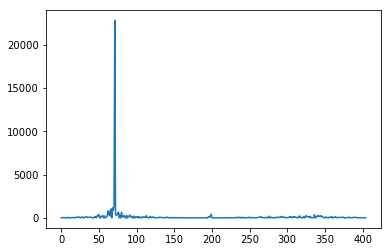

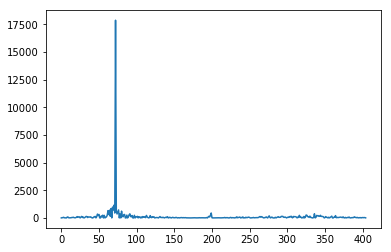

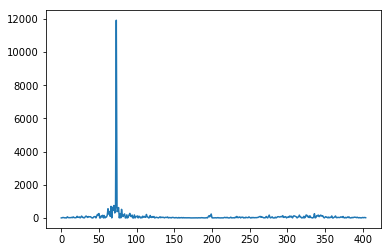

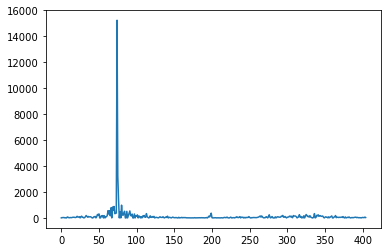

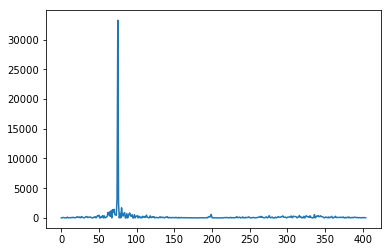

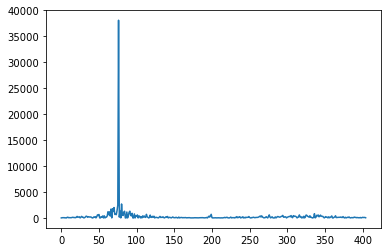

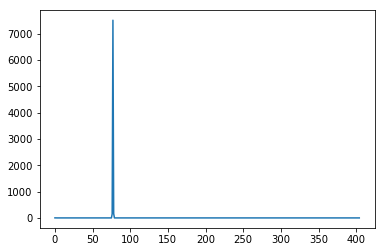

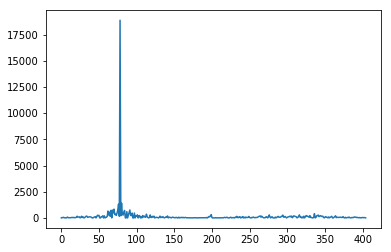

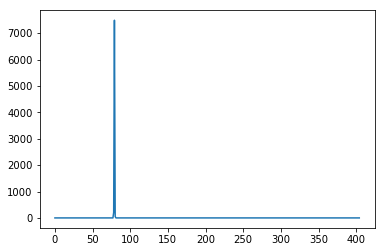

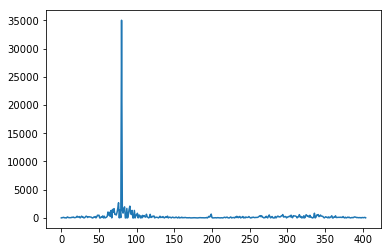

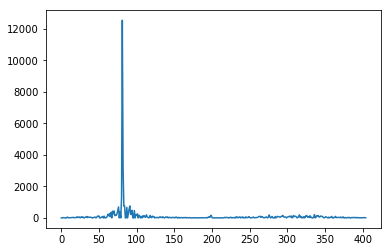

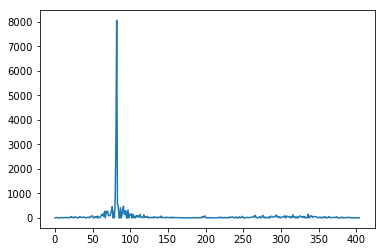

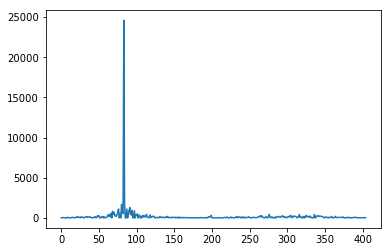

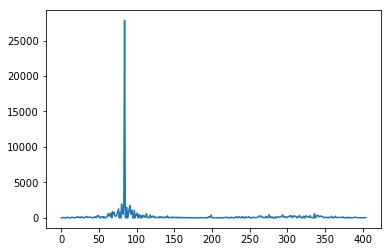

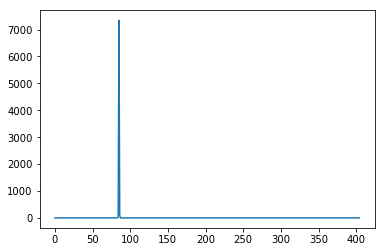

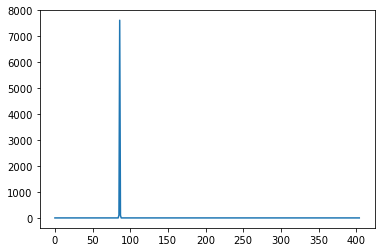

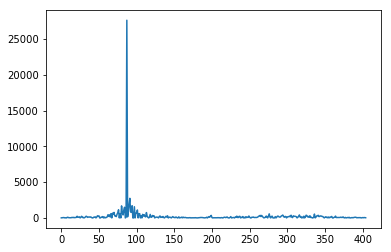

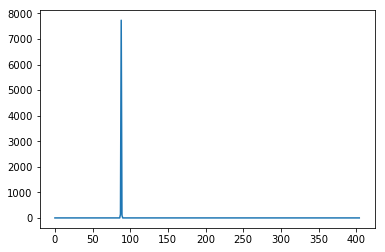

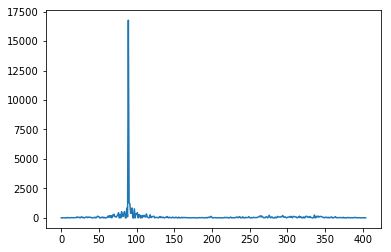

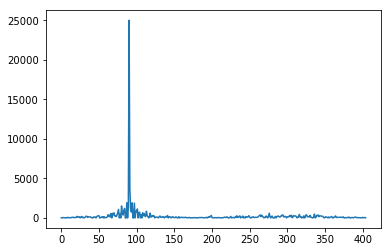

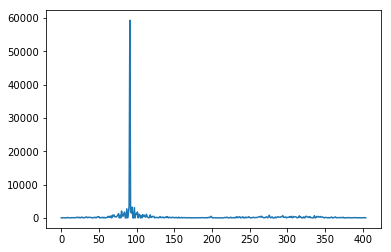

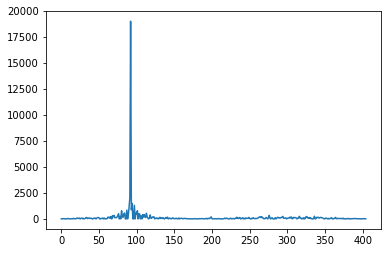

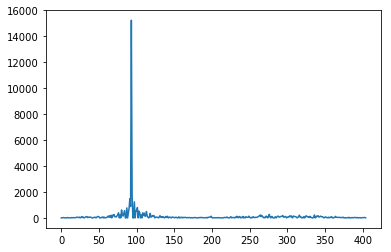

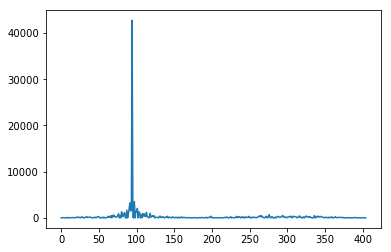

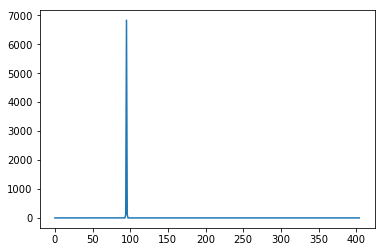

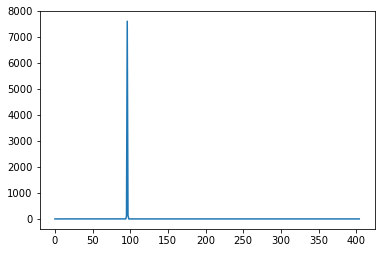

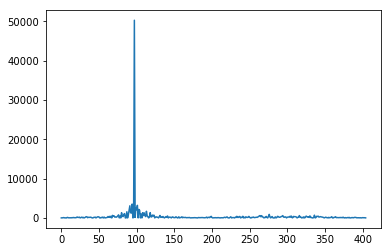

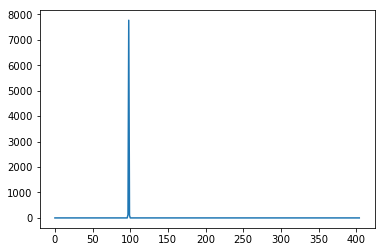

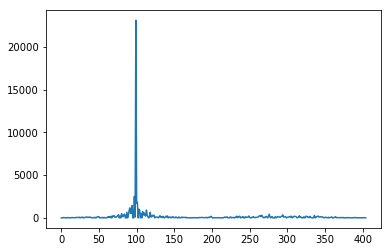

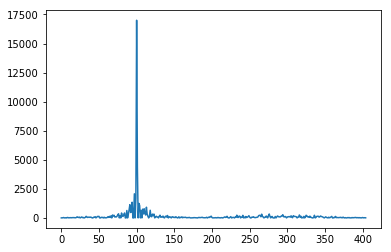

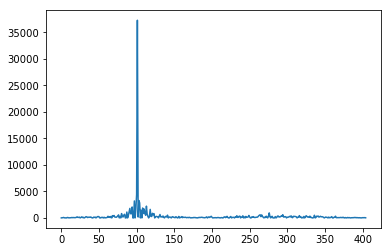

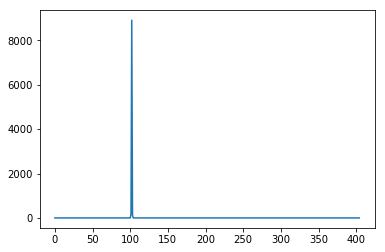

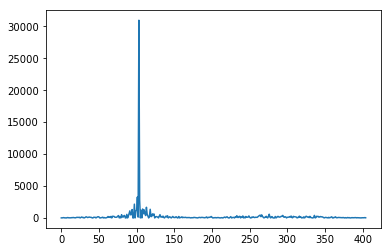

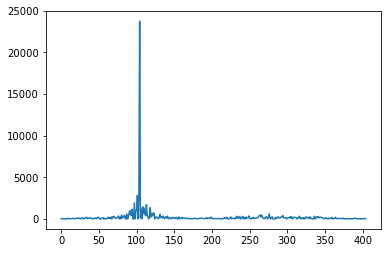

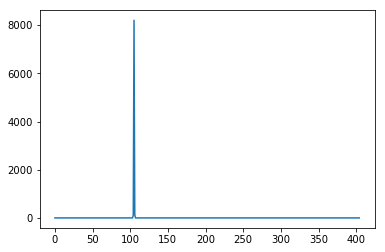

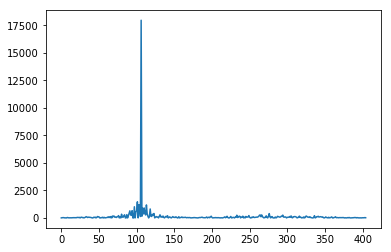

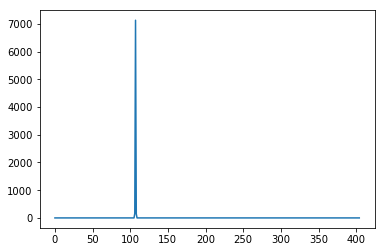

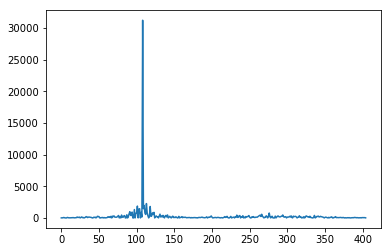

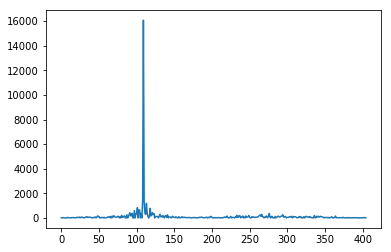

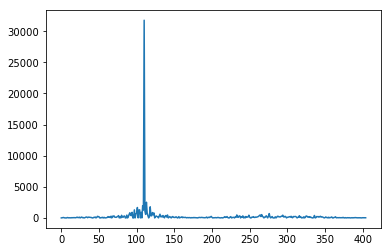

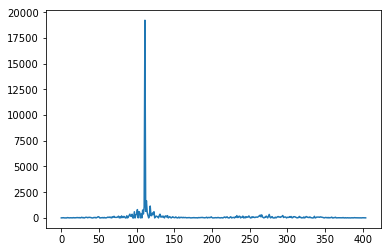

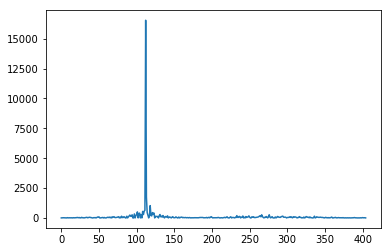

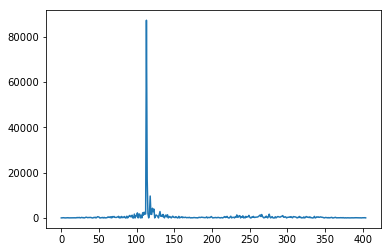

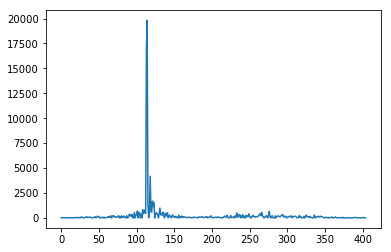

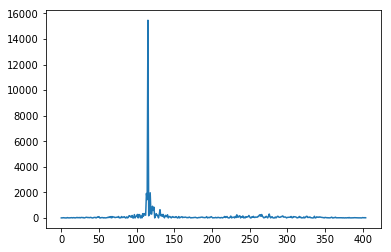

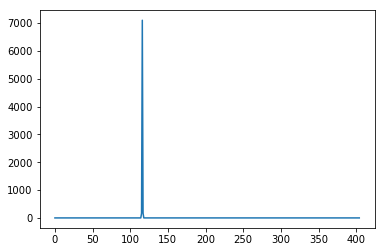

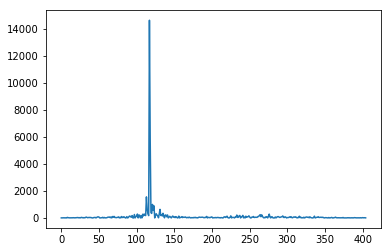

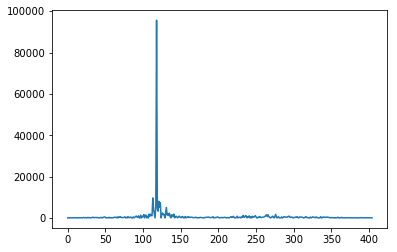

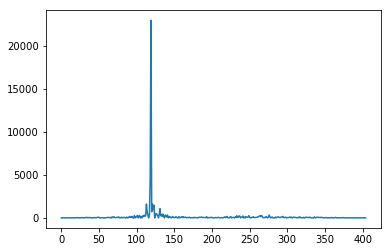

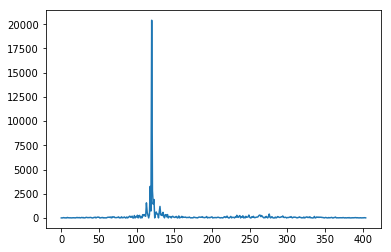

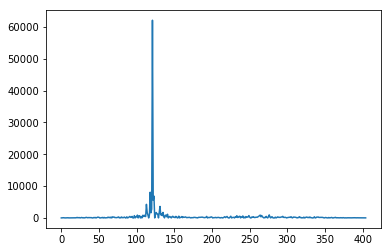

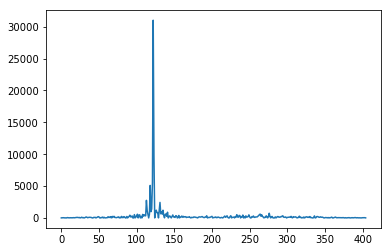

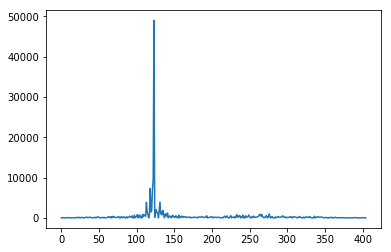

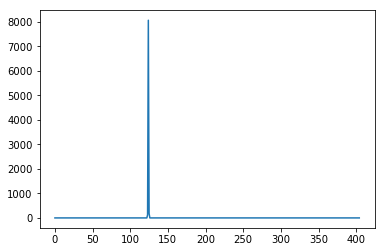

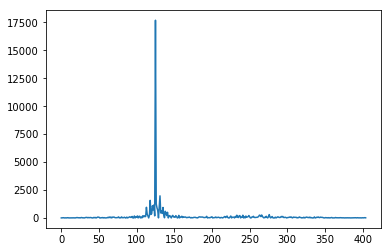

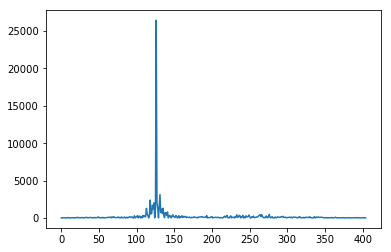

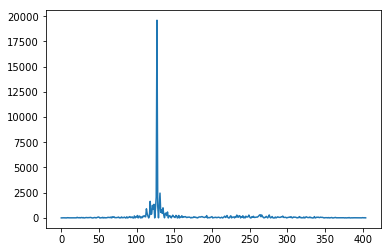

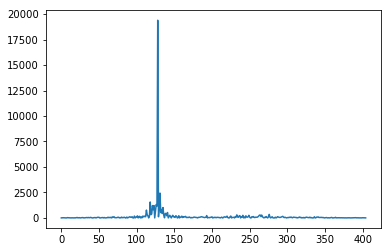

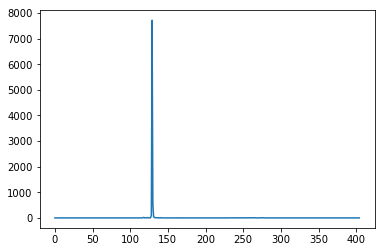

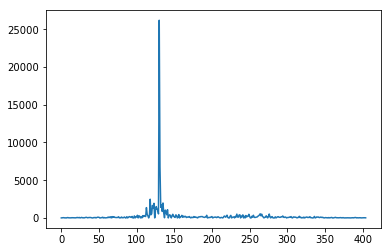

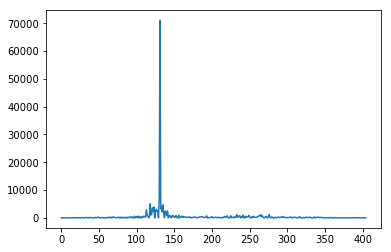

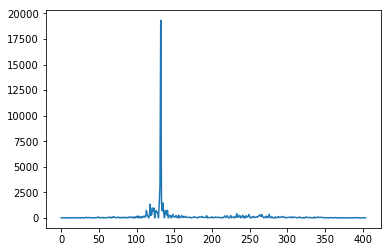

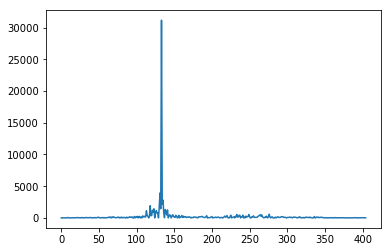

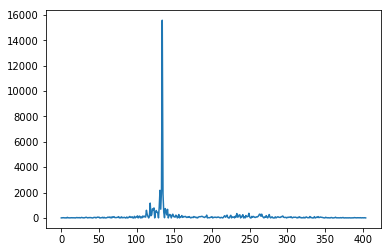

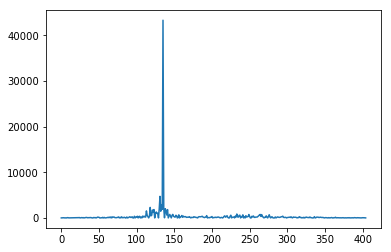

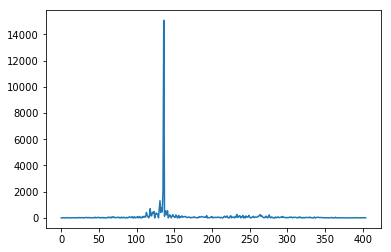

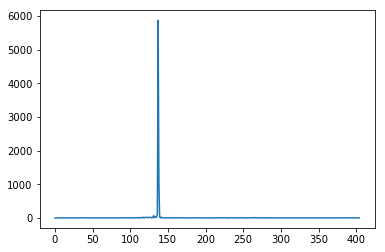

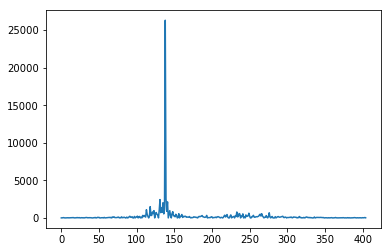

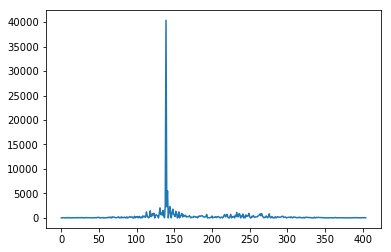

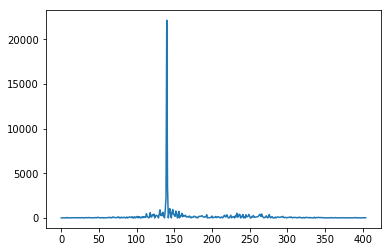

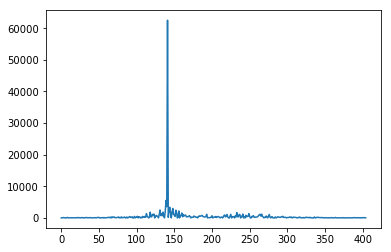

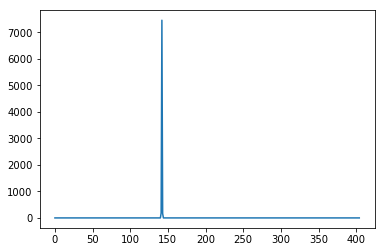

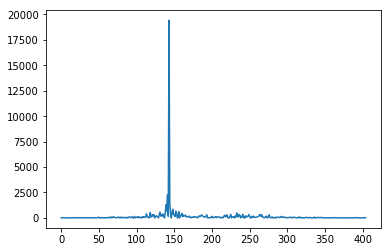

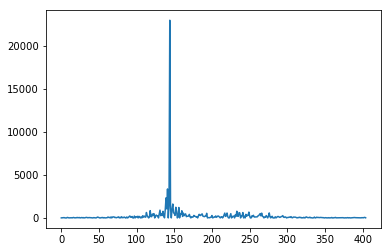

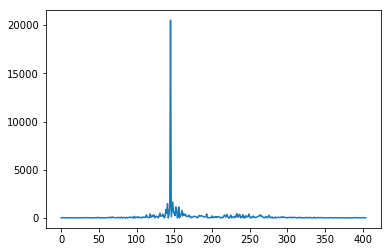

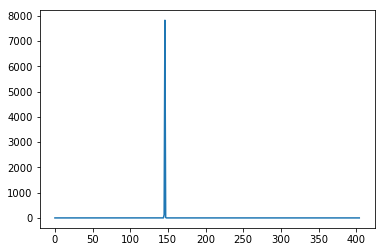

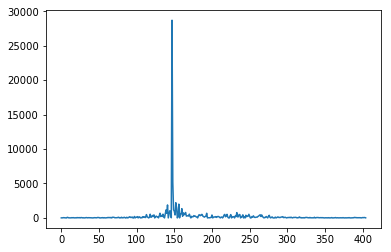

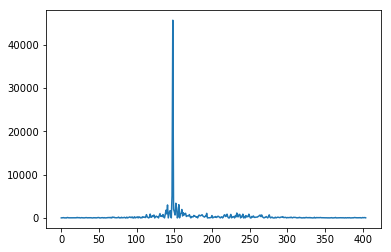

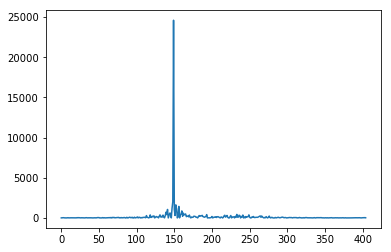

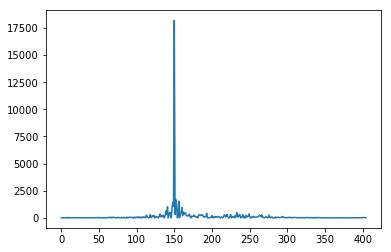

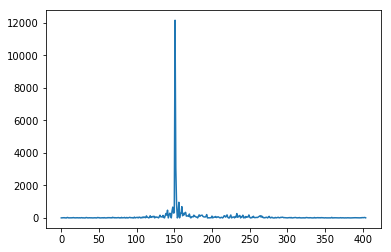

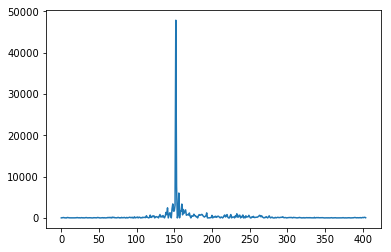

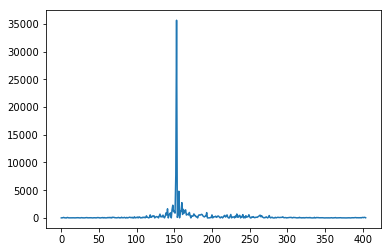

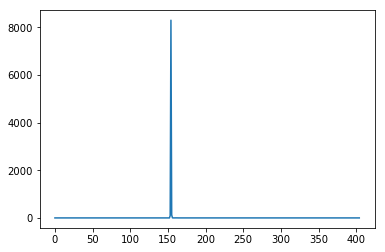

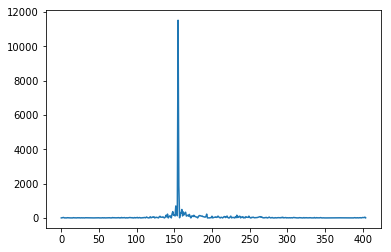

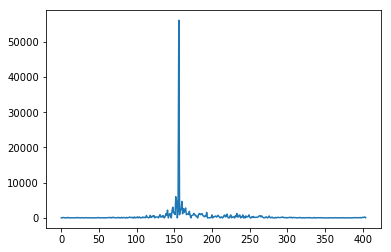

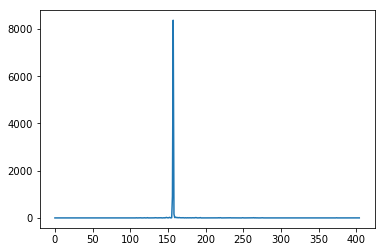

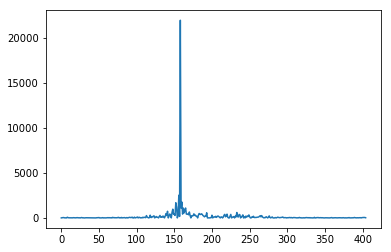

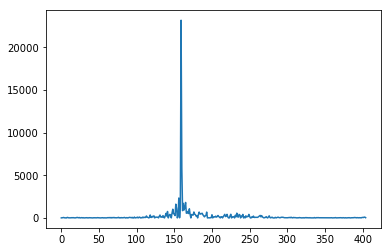

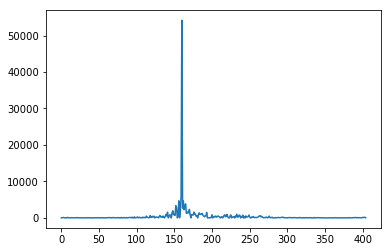

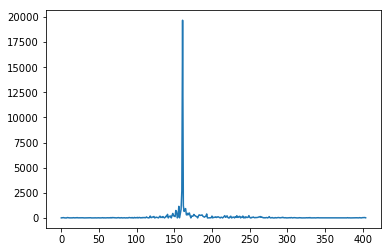

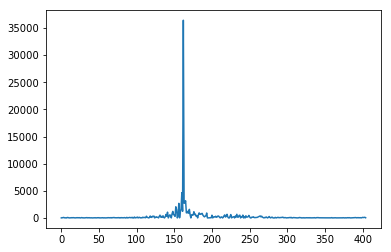

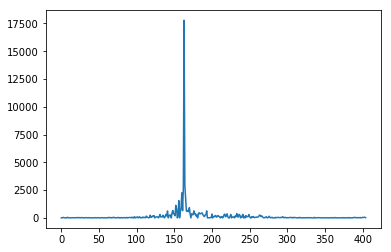

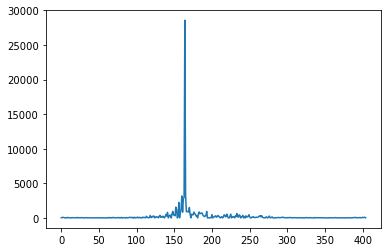

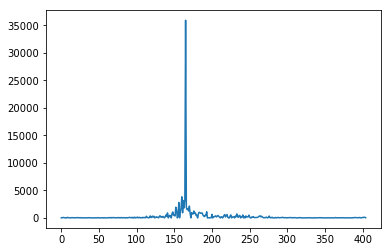

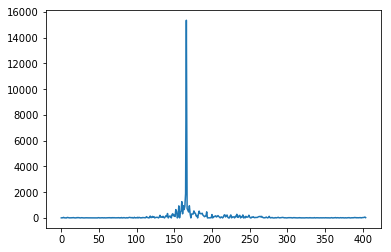

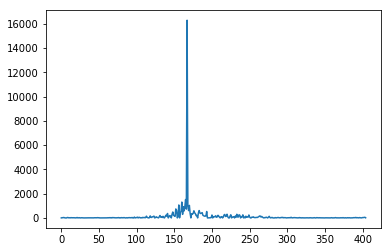

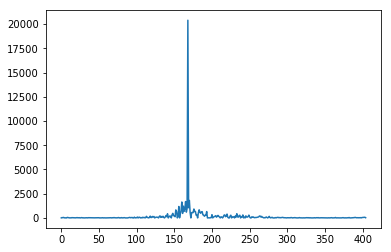

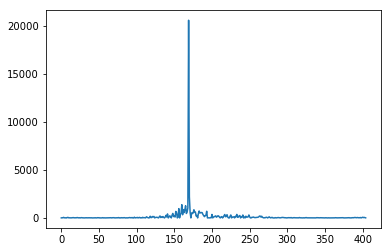

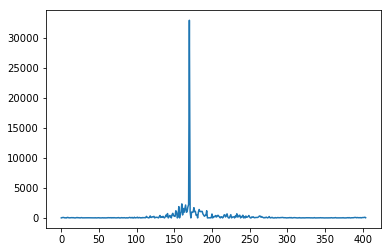

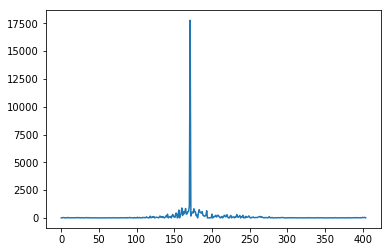

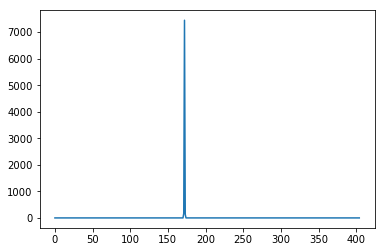

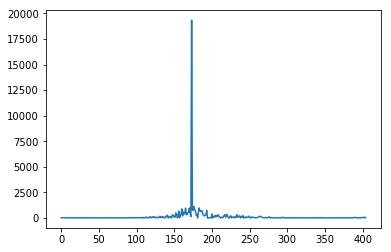

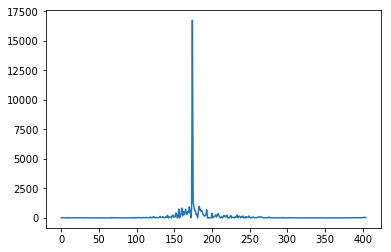

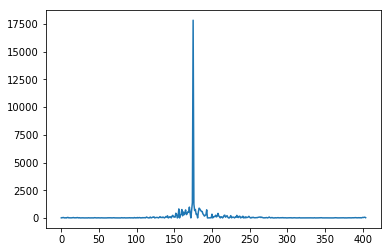

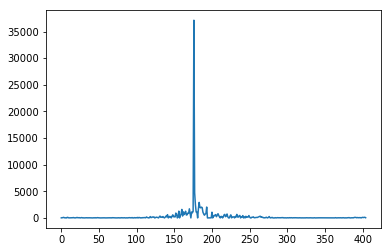

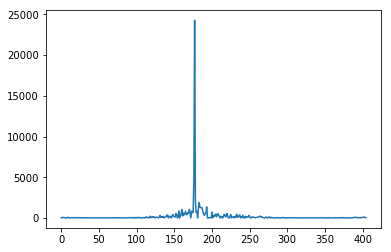

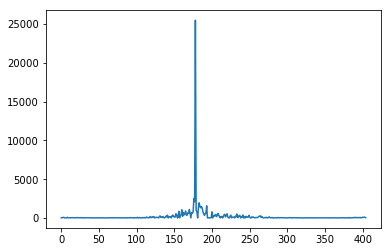

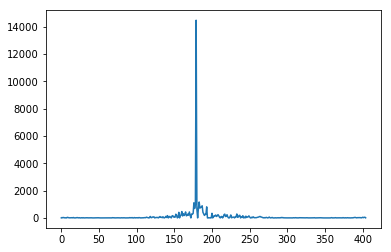

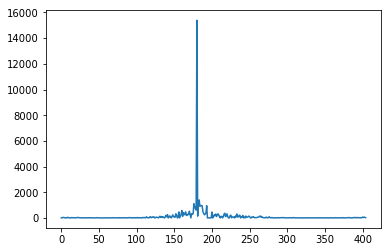

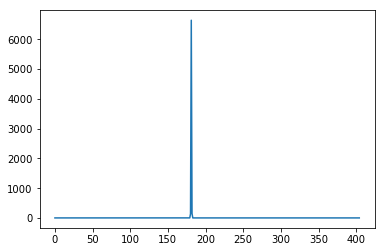

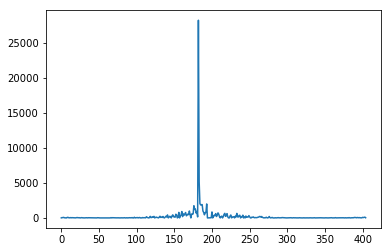

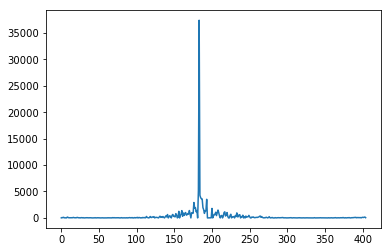

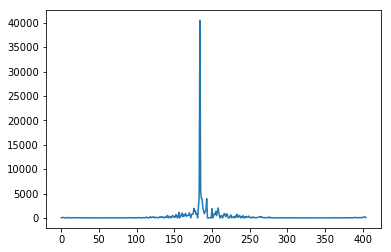

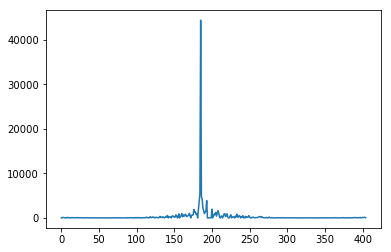

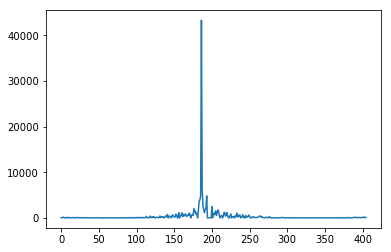

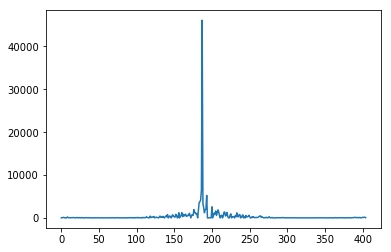

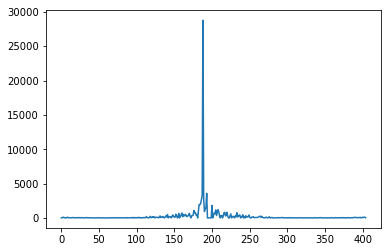

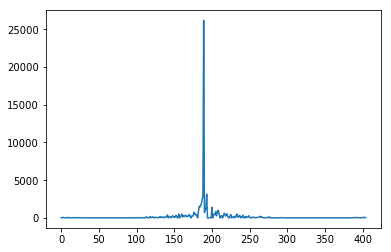

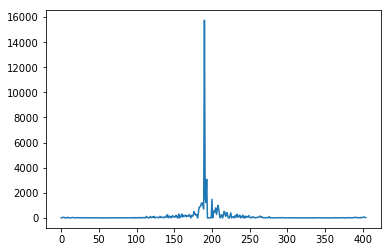

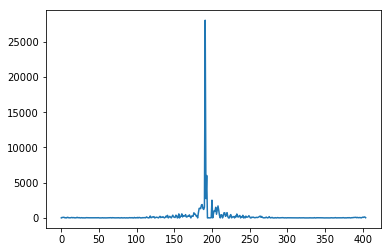

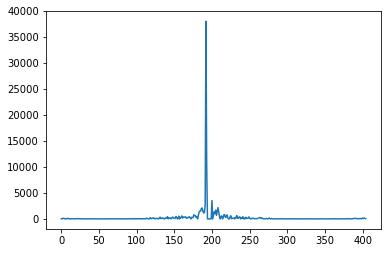

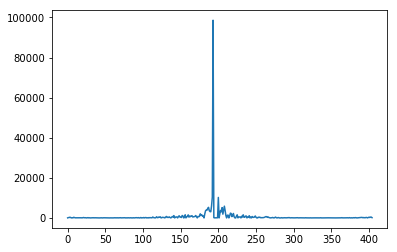

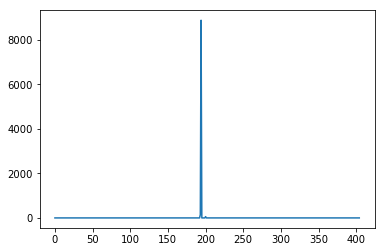

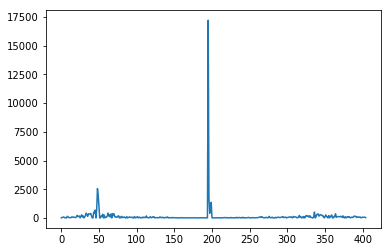

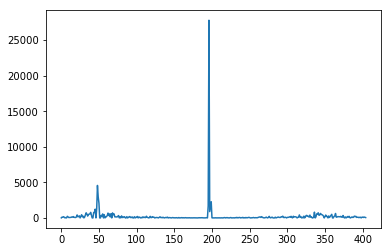

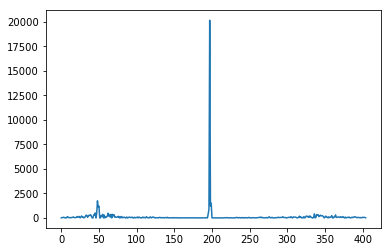

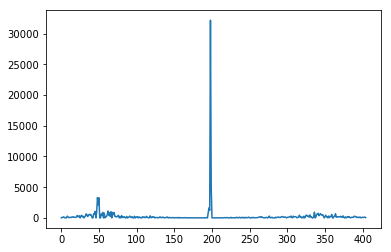

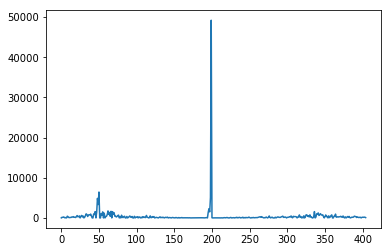

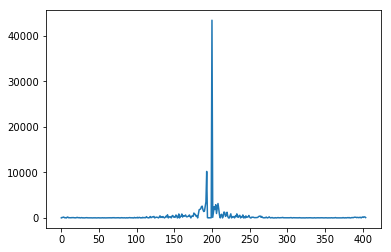

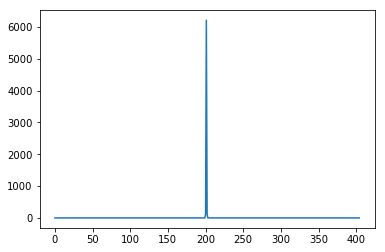

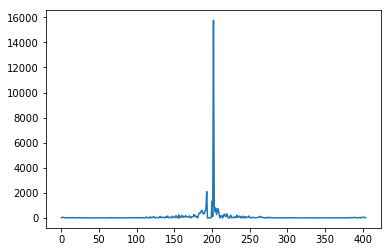

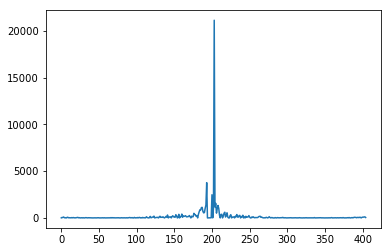

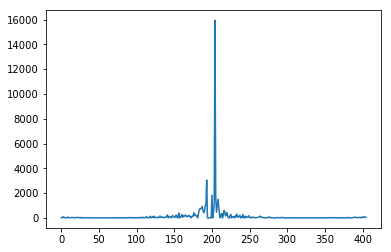

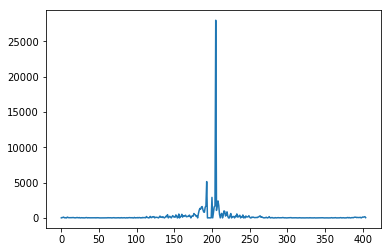

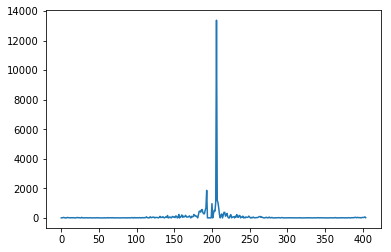

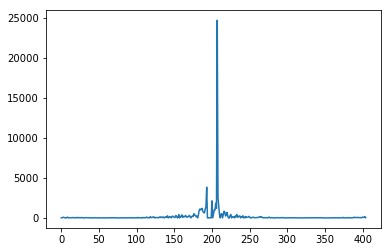

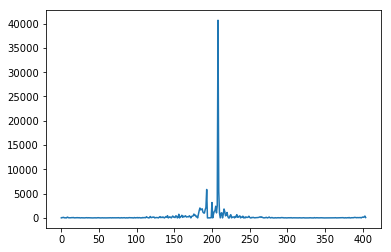

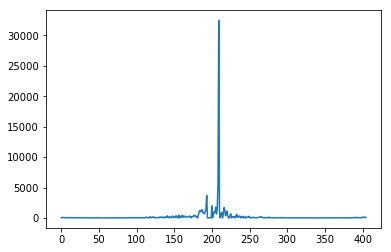

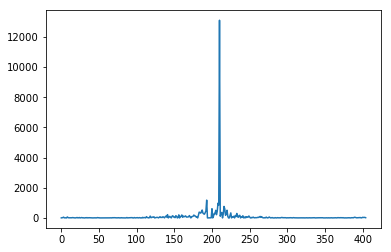

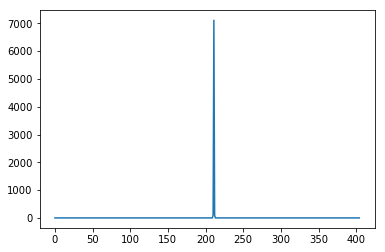

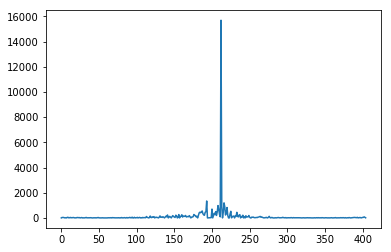

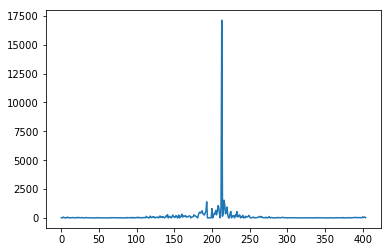

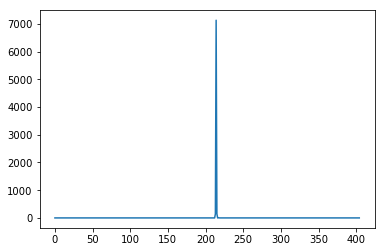

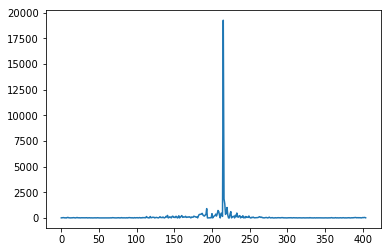

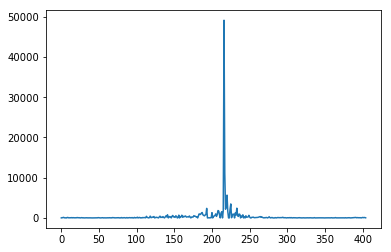

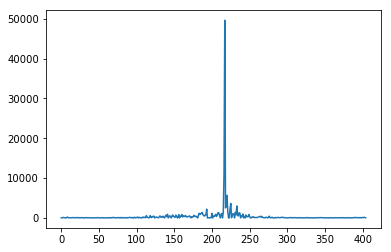

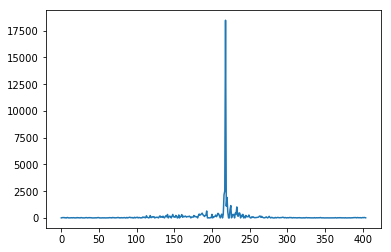

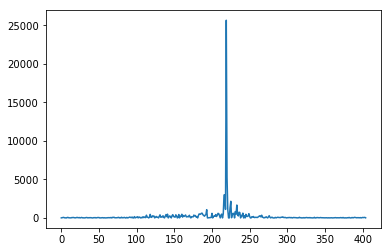

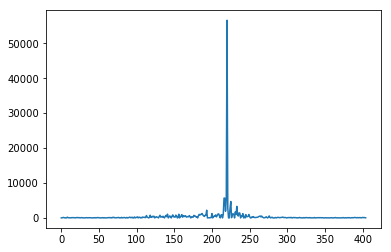

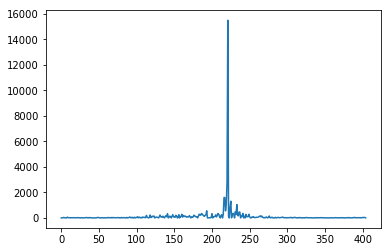

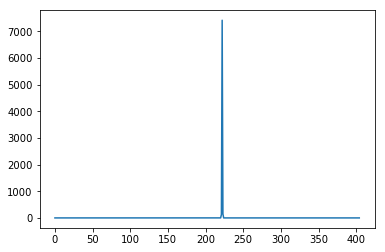

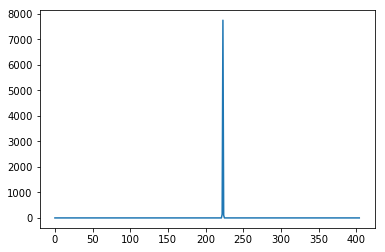

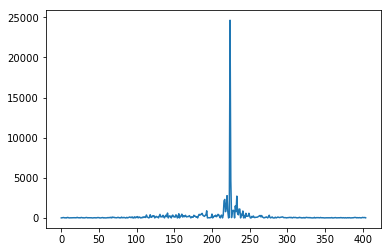

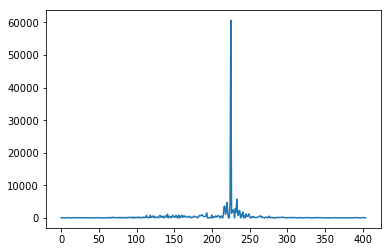

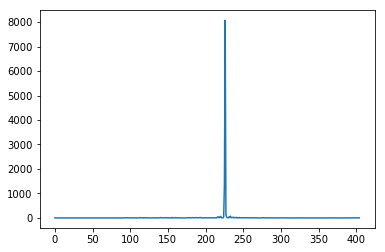

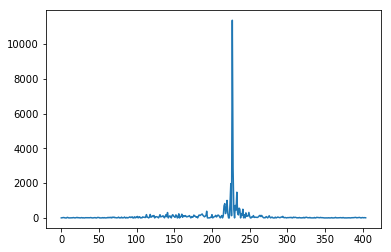

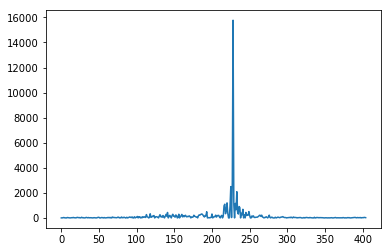

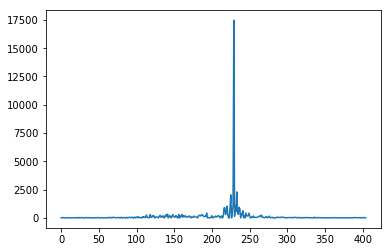

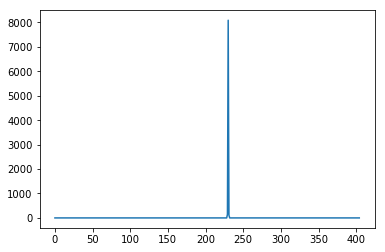

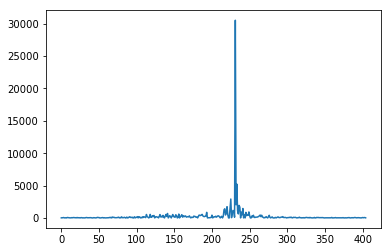

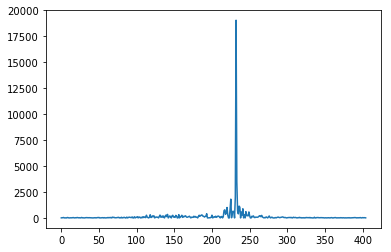

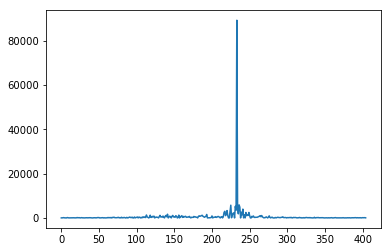

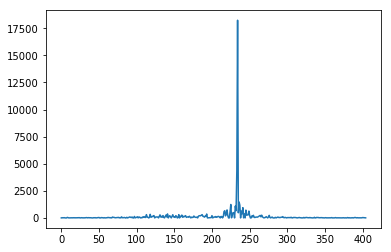

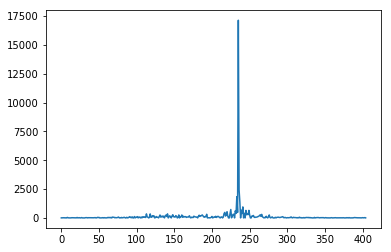

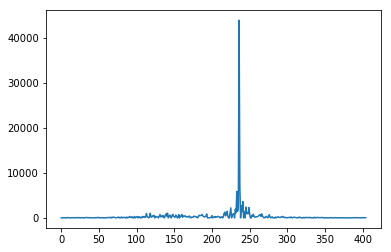

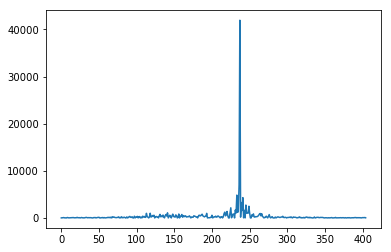

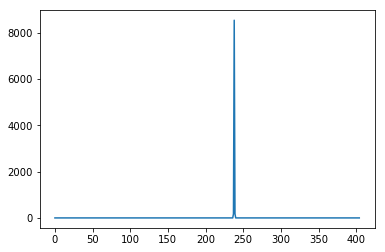

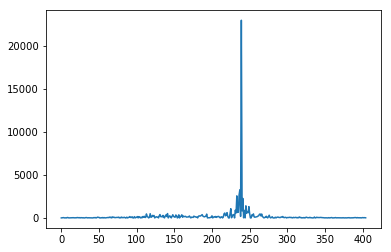

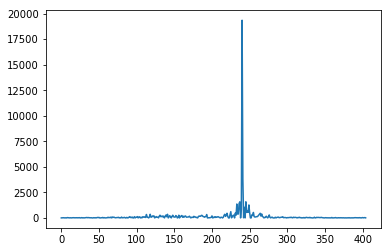

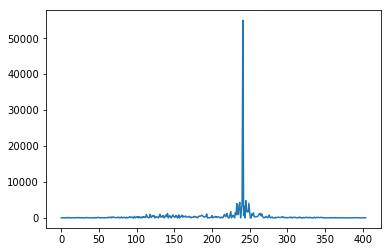

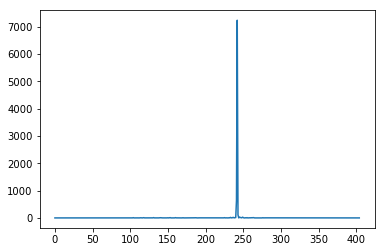

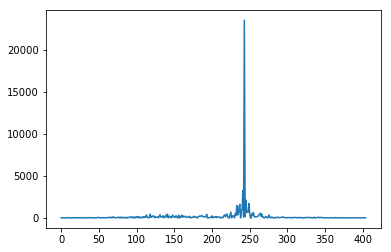

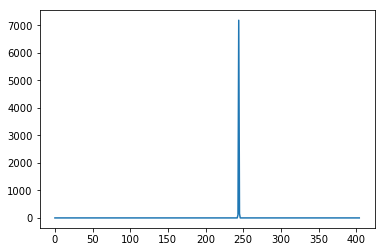

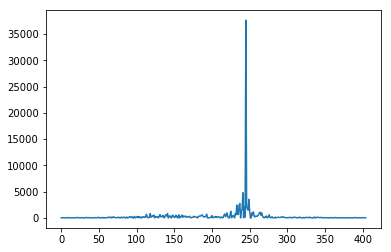

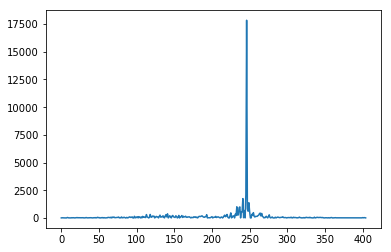

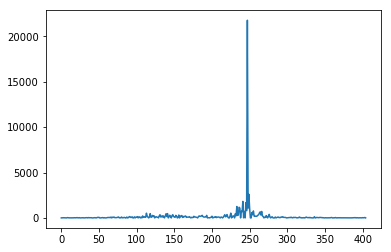

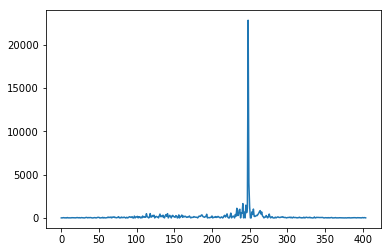

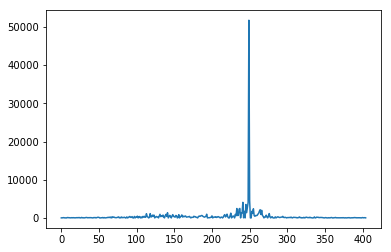

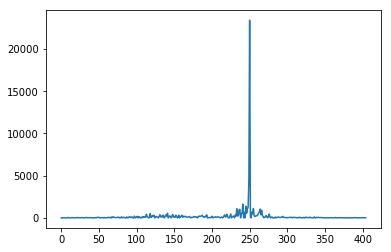

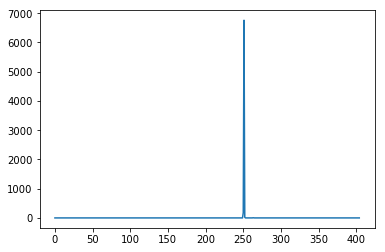

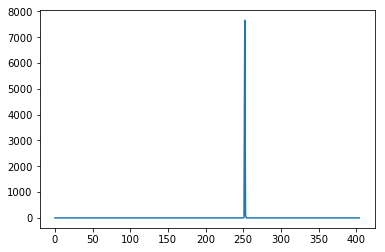

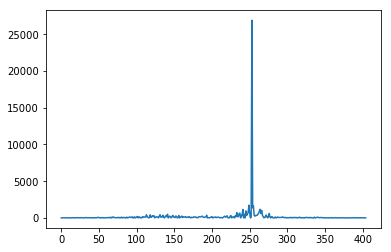

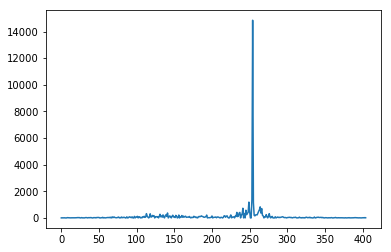

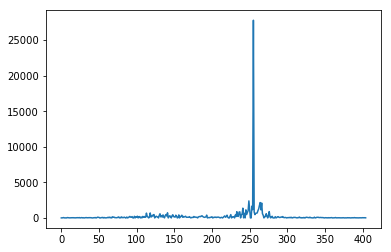

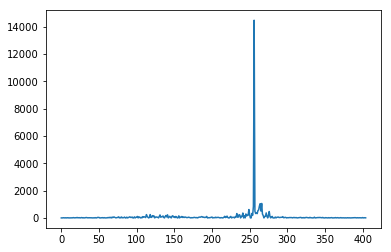

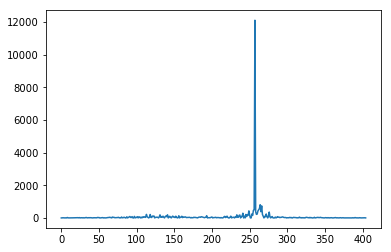

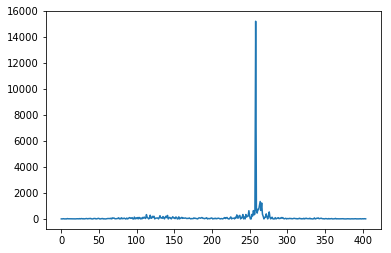

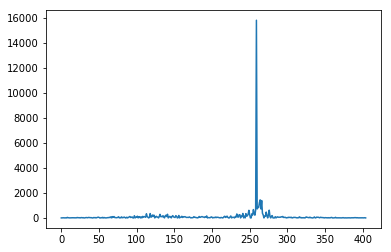

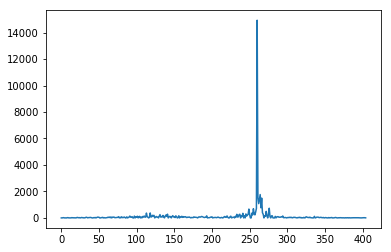

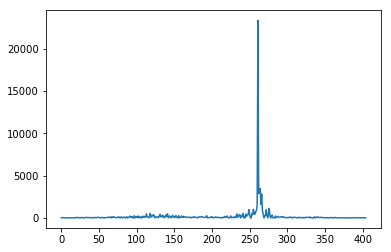

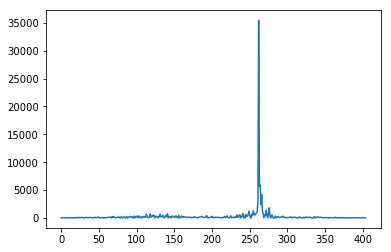

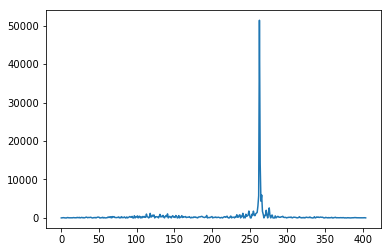

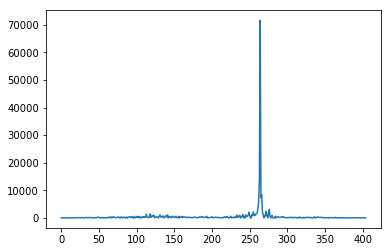

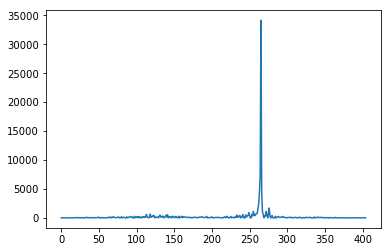

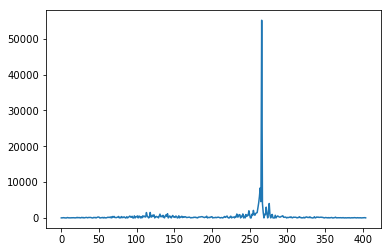

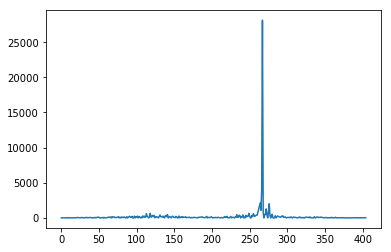

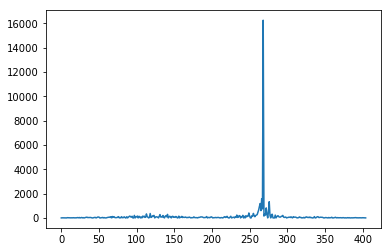

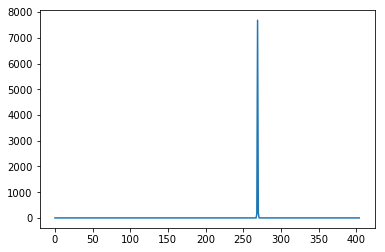

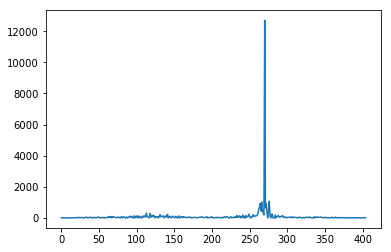

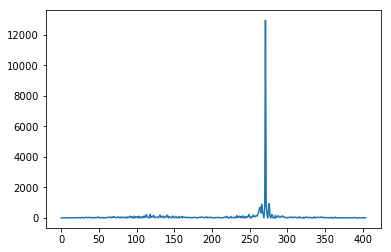

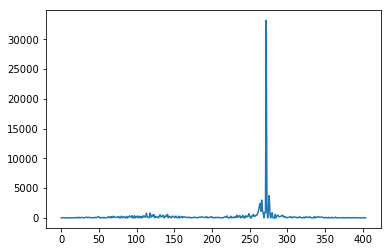

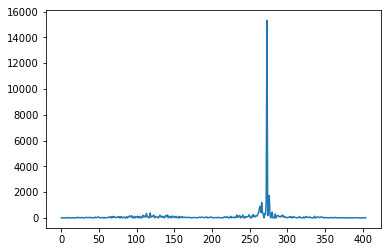

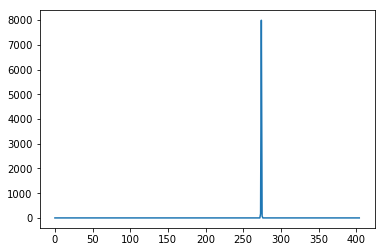

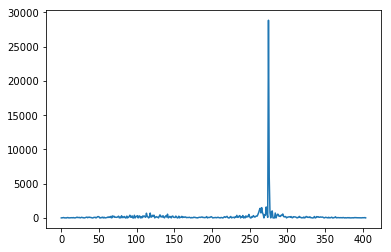

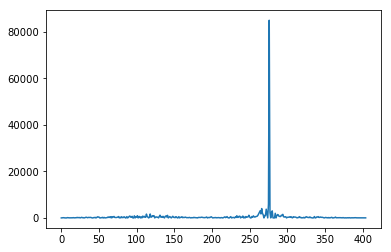

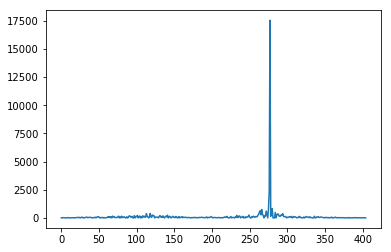

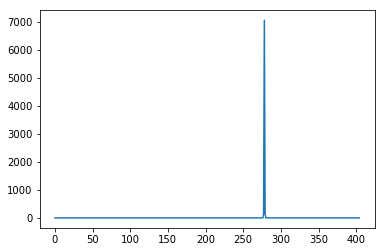

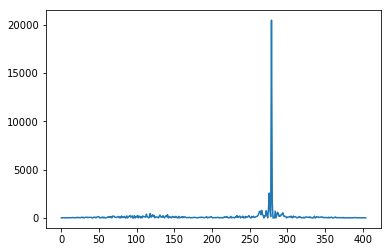

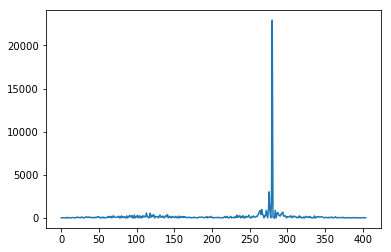

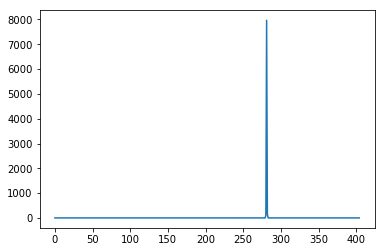

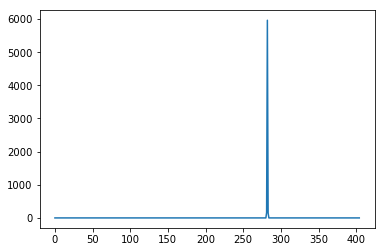

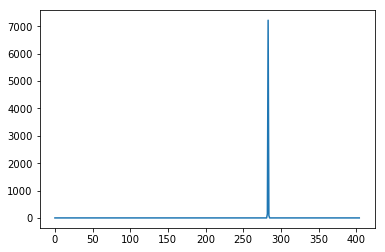

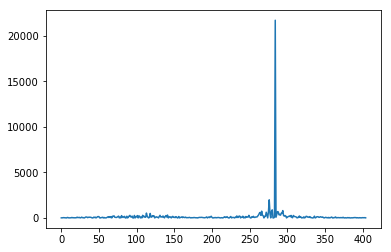

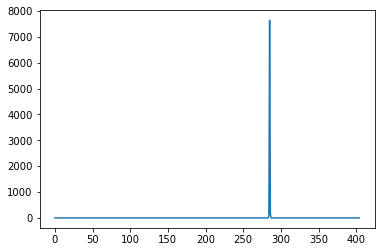

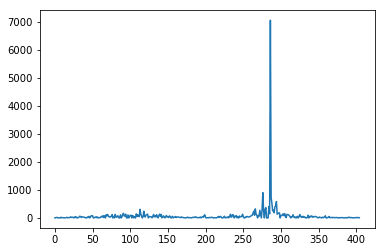

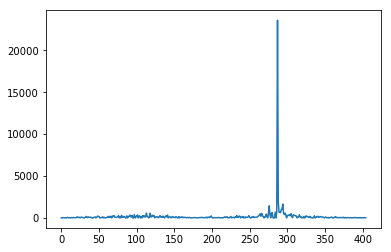

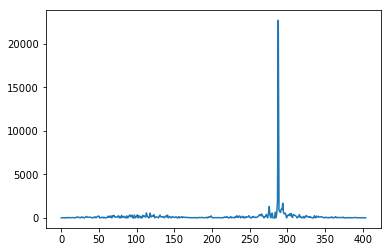

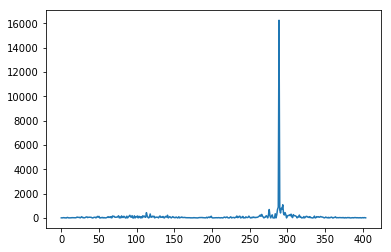

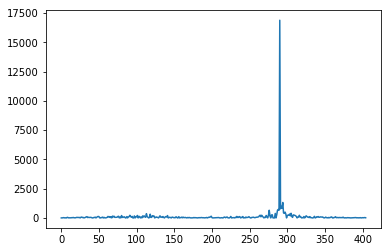

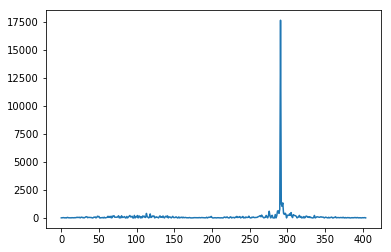

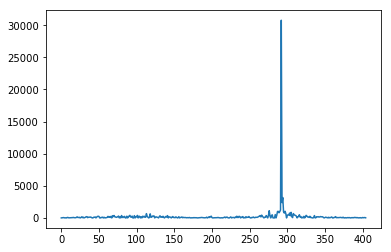

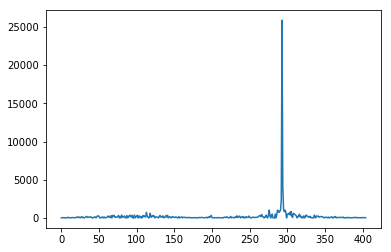

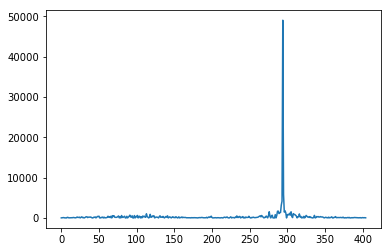

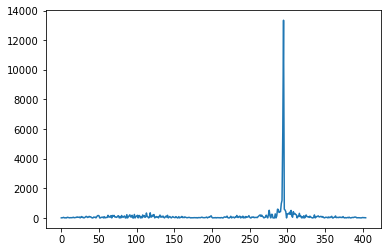

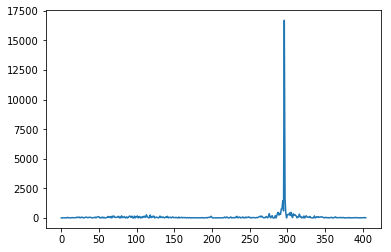

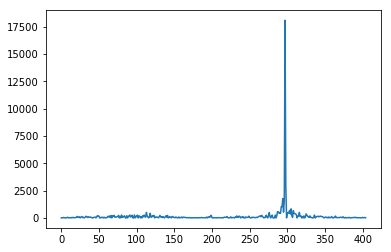

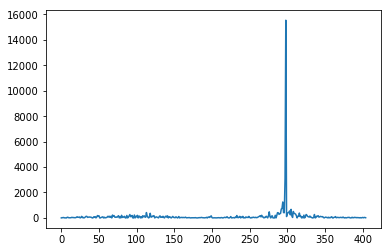

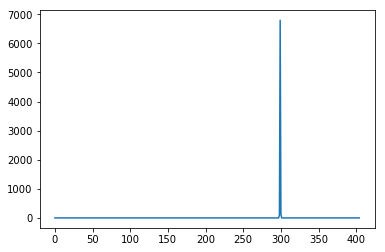

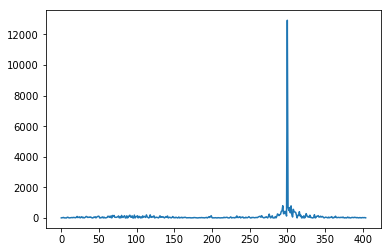

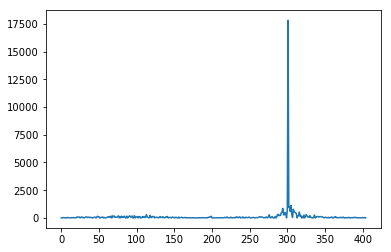

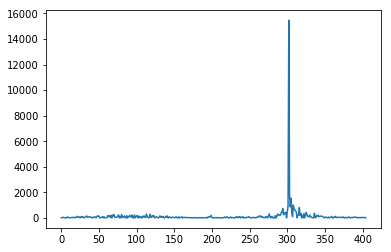

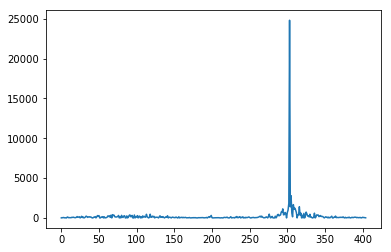

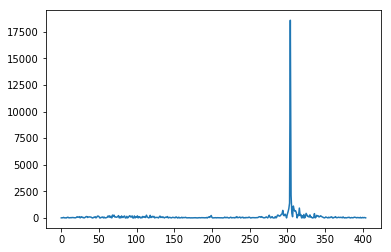

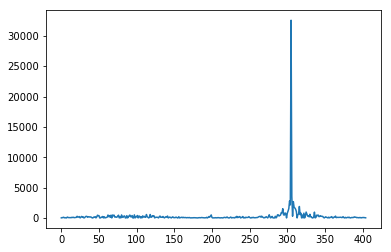

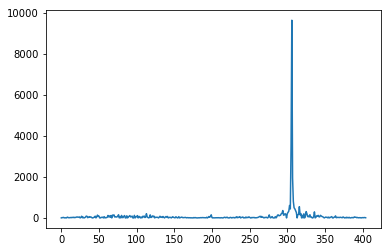

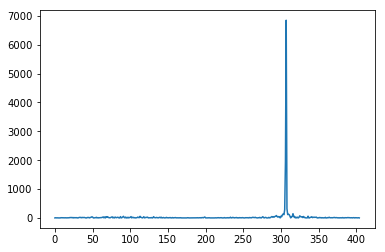

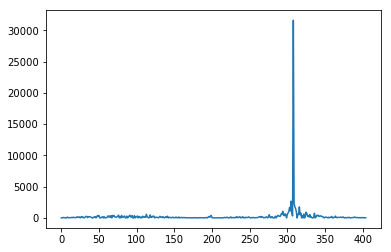

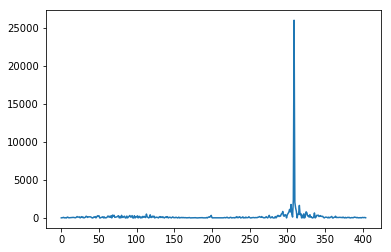

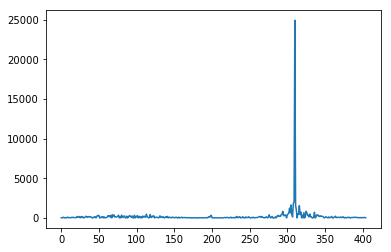

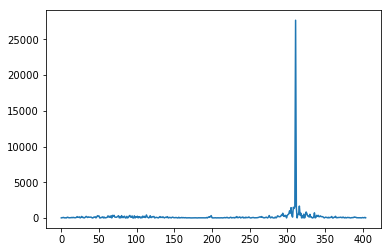

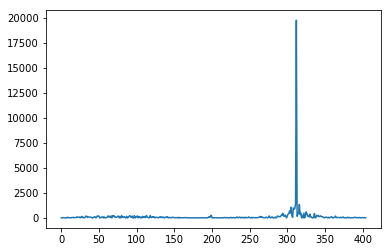

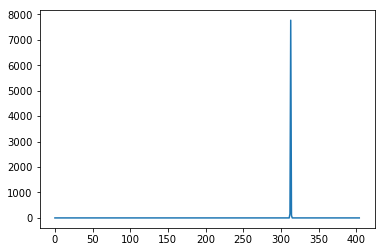

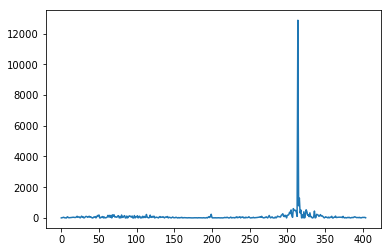

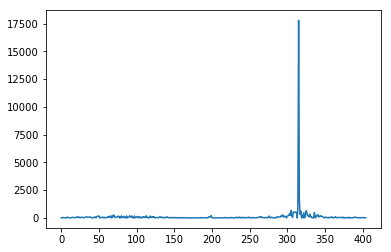

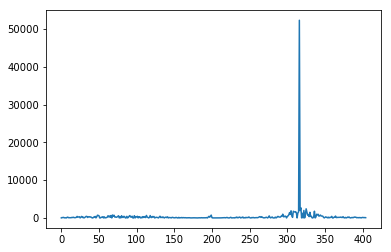

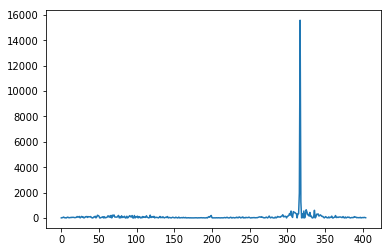

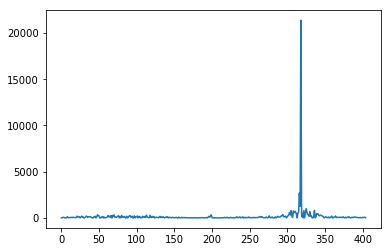

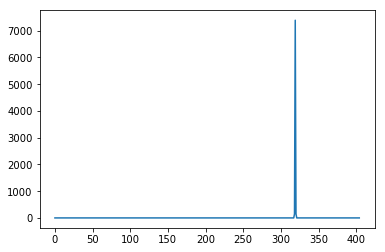

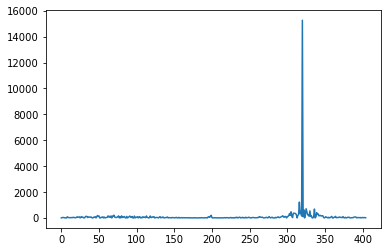

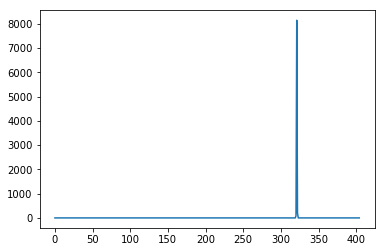

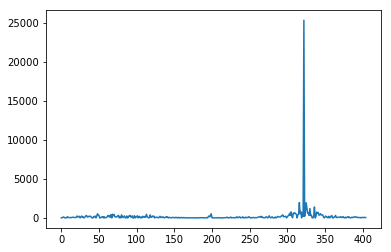

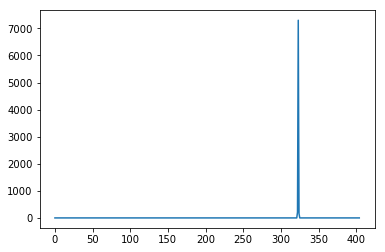

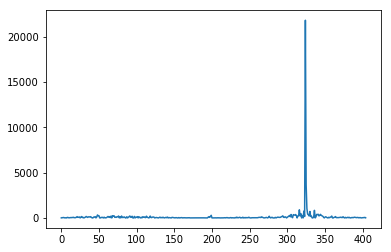

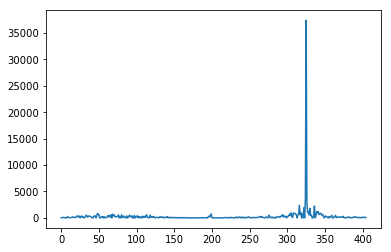

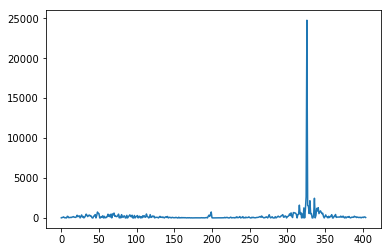

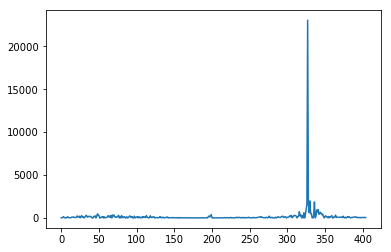

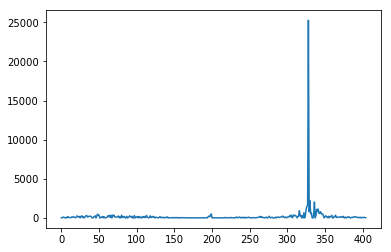

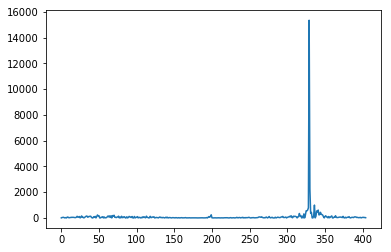

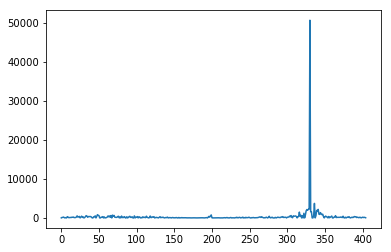

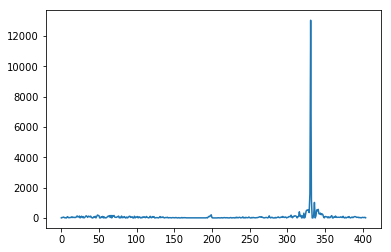

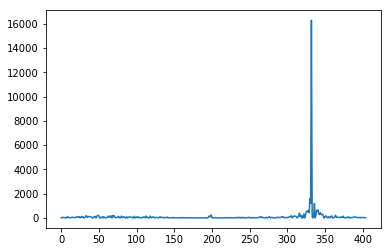

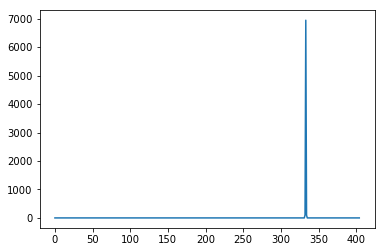

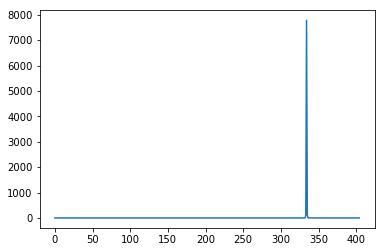

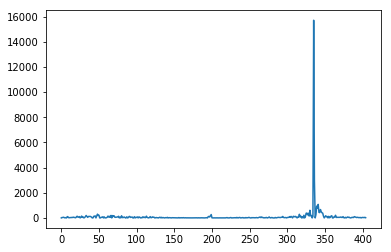

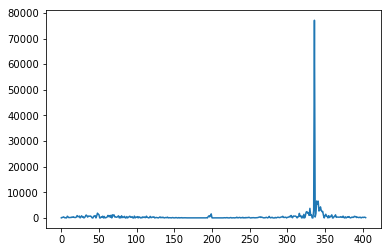

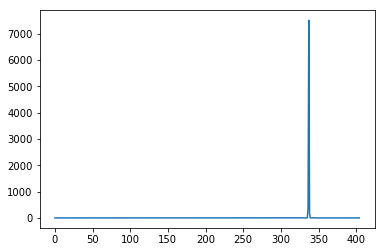

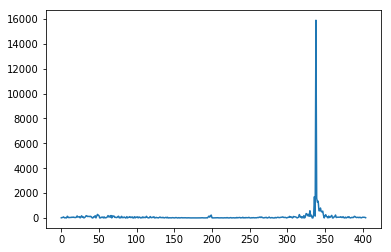

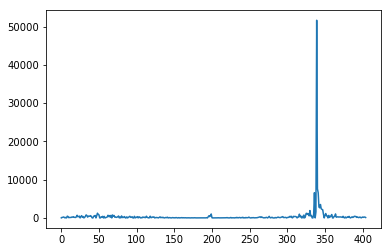

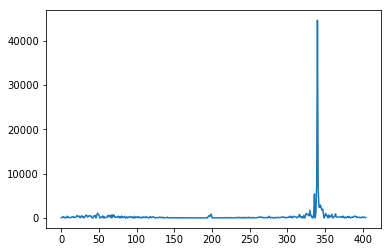

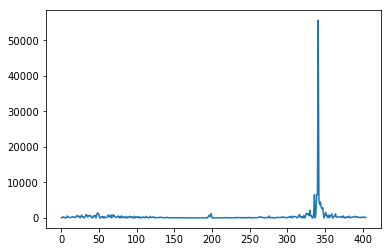

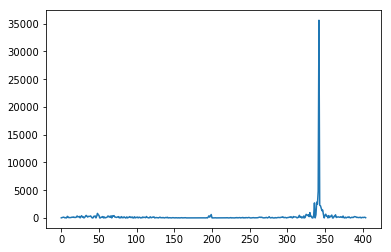

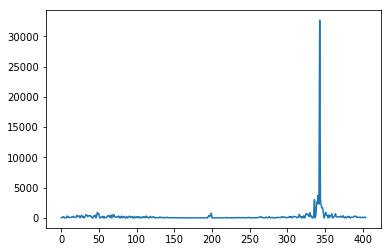

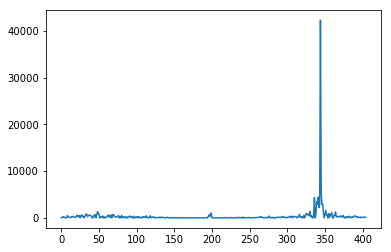

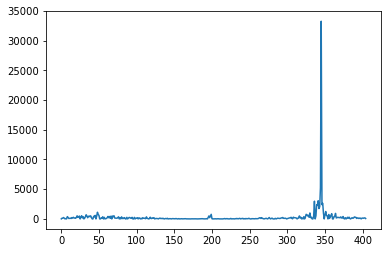

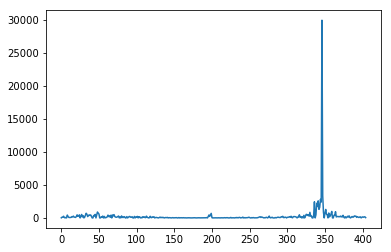

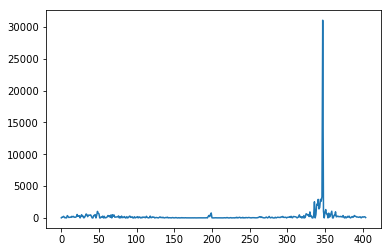

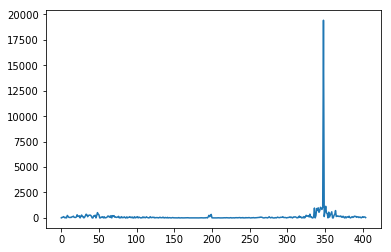

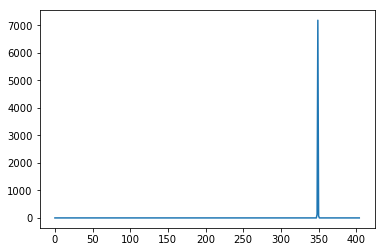

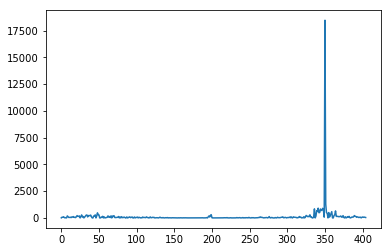

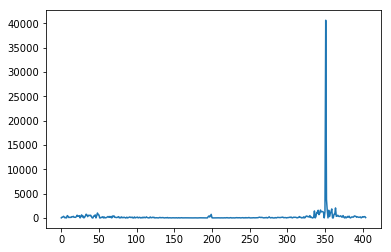

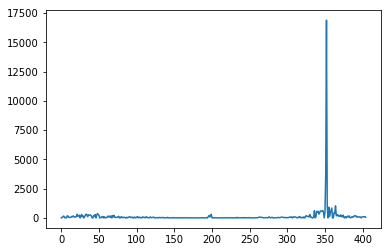

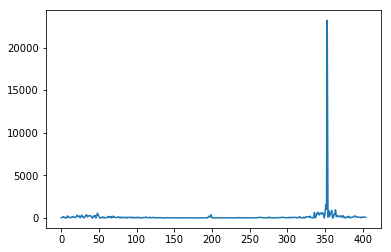

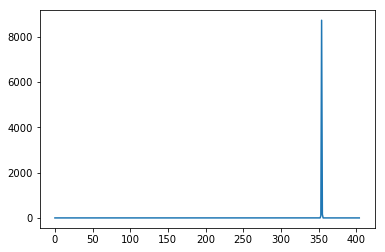

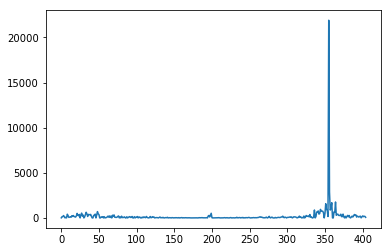

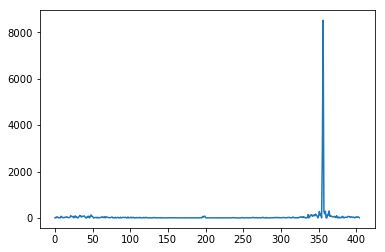

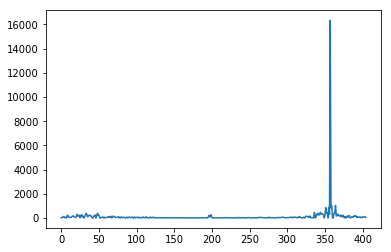

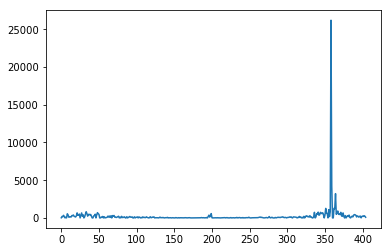

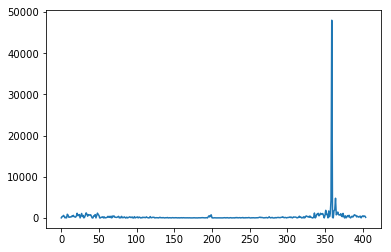

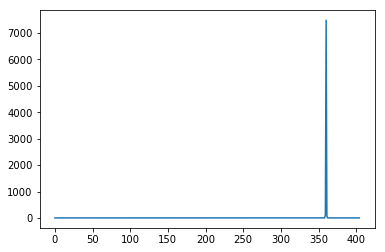

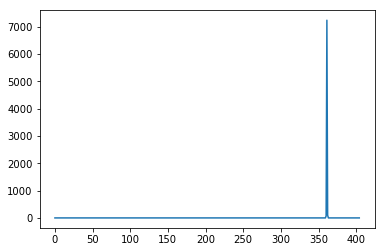

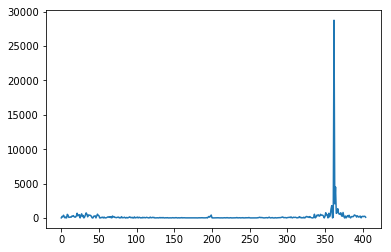

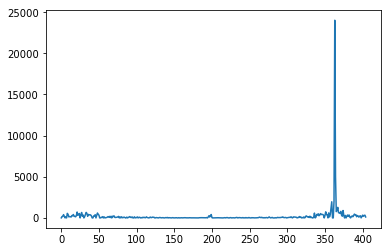

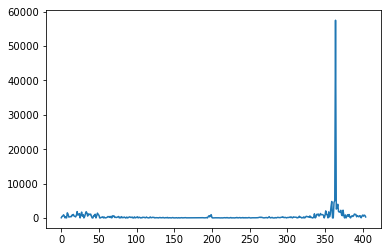

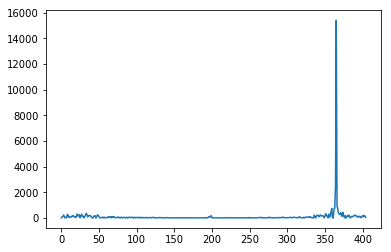

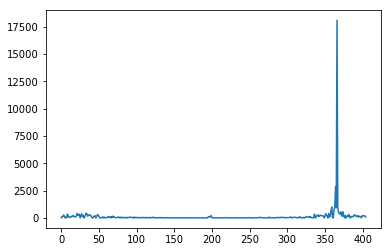

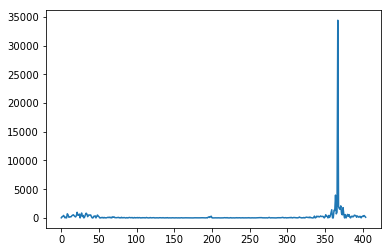

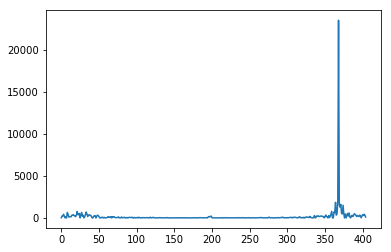

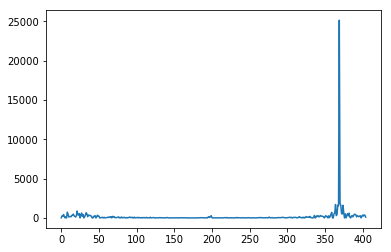

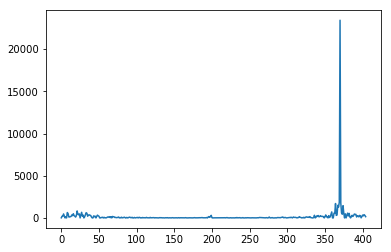

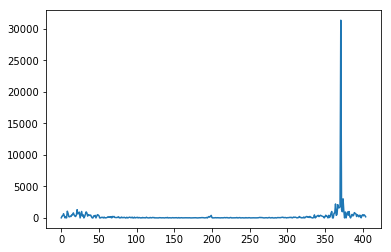

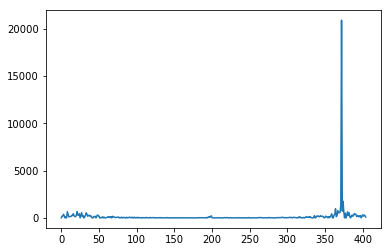

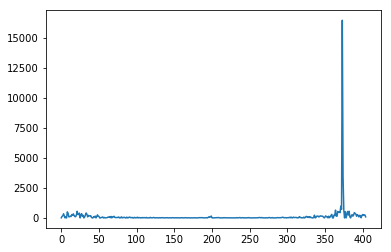

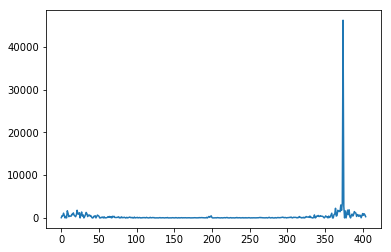

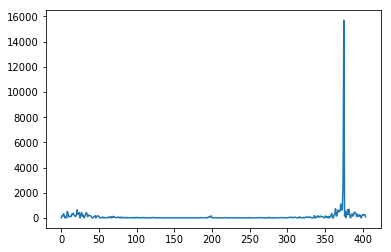

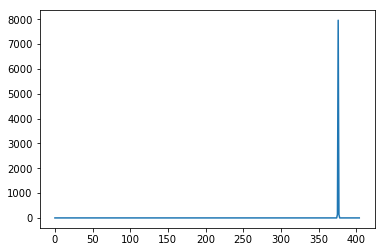

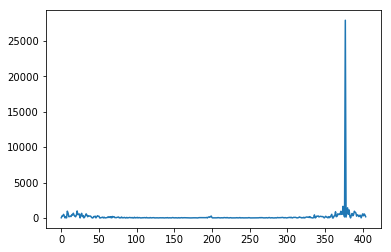

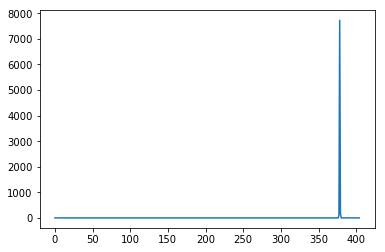

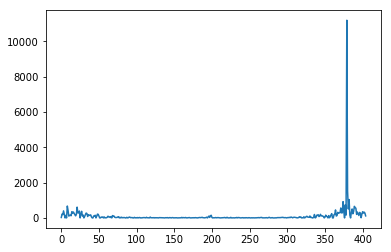

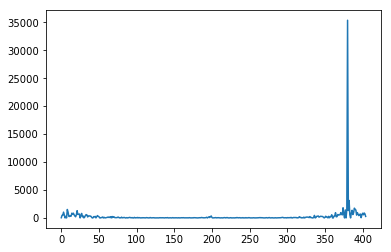

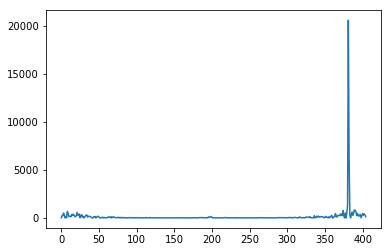

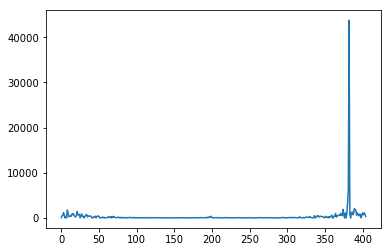

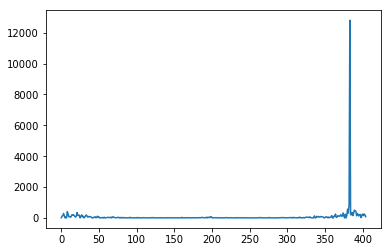

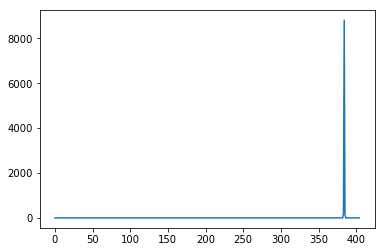

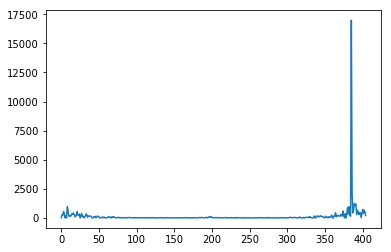

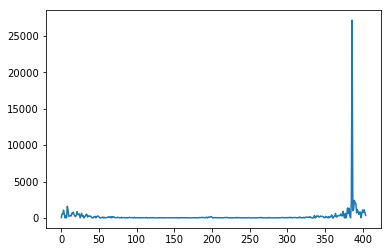

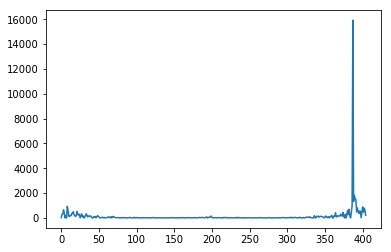

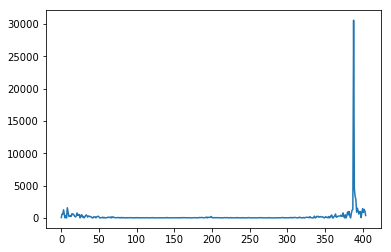

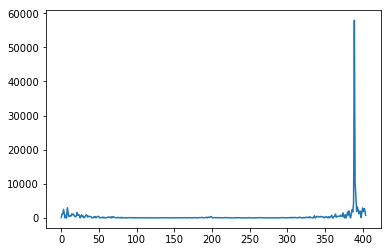

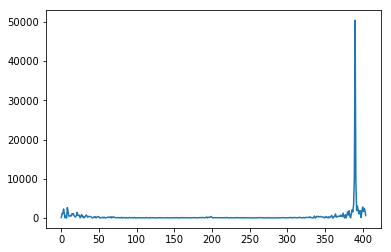

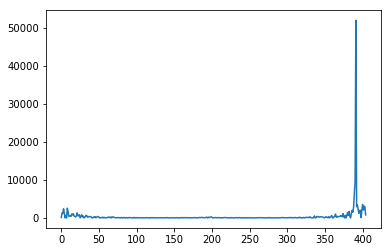

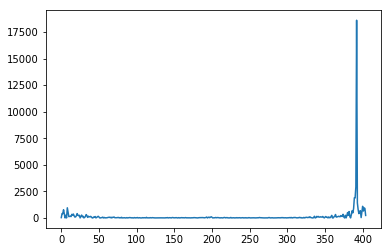

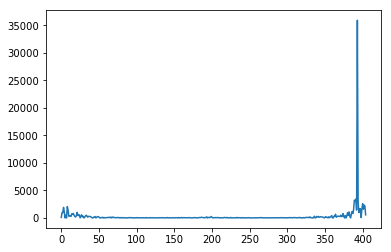

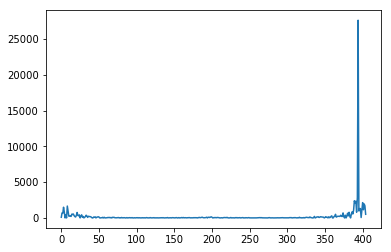

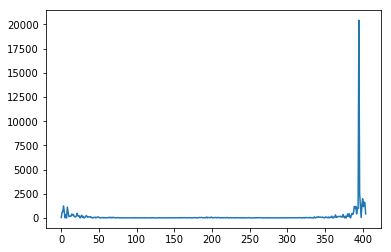

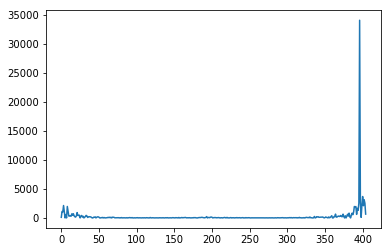

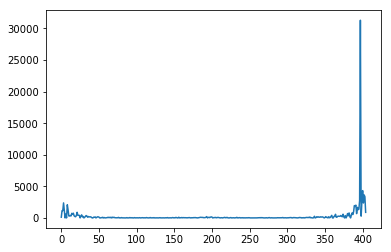

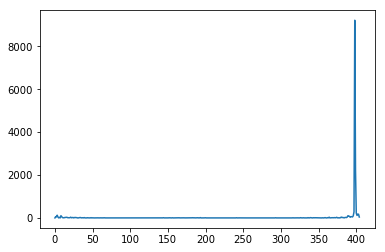

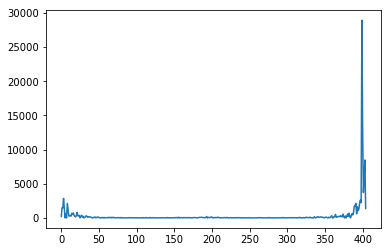

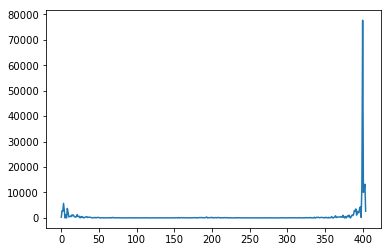

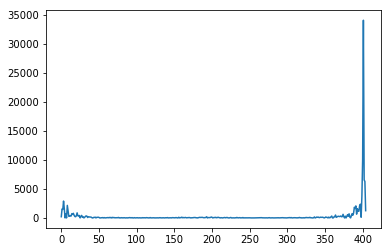

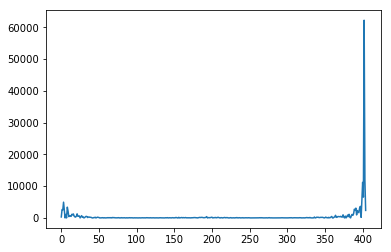

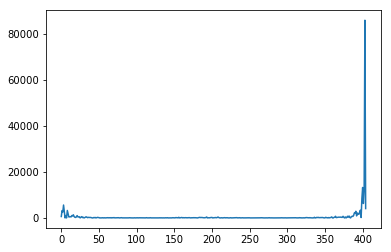

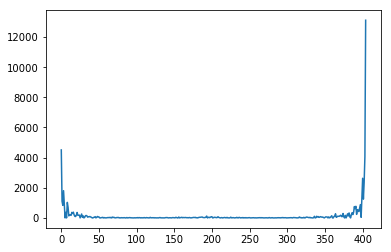

In [694]:
plt.show()

In [586]:
for i in range(len(matrix)):
   
    plt.plot(range(len(matrix)), matrix[i])

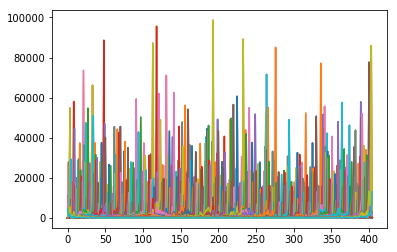

In [587]:
plt.show()

In [434]:
matrix[100]

[1,
 10,
 7,
 33,
 8,
 0,
 16,
 0,
 39,
 28,
 5,
 16,
 25,
 9,
 22,
 24,
 33,
 27,
 15,
 13,
 37,
 93,
 55,
 34,
 69,
 0,
 40,
 81,
 25,
 45,
 0,
 14,
 57,
 135,
 78,
 35,
 63,
 67,
 45,
 74,
 43,
 0,
 0,
 64,
 51,
 107,
 0,
 61,
 125,
 123,
 132,
 0,
 0,
 58,
 35,
 49,
 0,
 57,
 0,
 24,
 10,
 41,
 107,
 45,
 135,
 39,
 177,
 0,
 248,
 167,
 229,
 80,
 90,
 81,
 144,
 275,
 355,
 0,
 185,
 0,
 422,
 164,
 130,
 295,
 424,
 0,
 0,
 638,
 0,
 313,
 692,
 1137,
 467,
 528,
 1349,
 0,
 0,
 2075,
 0,
 1706,
 17004,
 4421,
 0,
 1246,
 1067,
 1,
 655,
 0,
 754,
 342,
 785,
 372,
 250,
 921,
 322,
 135,
 0,
 125,
 659,
 124,
 103,
 326,
 193,
 328,
 0,
 64,
 147,
 87,
 78,
 0,
 131,
 232,
 55,
 105,
 69,
 160,
 34,
 3,
 114,
 154,
 68,
 207,
 0,
 63,
 103,
 58,
 0,
 91,
 98,
 40,
 52,
 26,
 97,
 56,
 0,
 13,
 95,
 0,
 48,
 33,
 89,
 16,
 53,
 40,
 46,
 58,
 12,
 28,
 18,
 27,
 44,
 10,
 0,
 9,
 10,
 7,
 27,
 24,
 22,
 12,
 6,
 0,
 31,
 42,
 22,
 28,
 39,
 55,
 23,
 16,
 13,
 21,
 20,
 56,
 0,


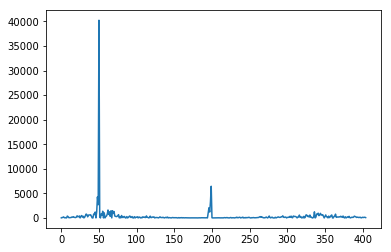

In [740]:

plt.plot(matrix[50])
plt.show()

In [ ]:
a_list=[]
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        

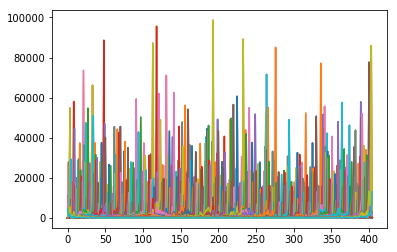

IndexError: list index out of range

In [605]:
a_list=[]
for j in range(len(matrix)):
    for i in range(len(matrix[0])):
       
     
    plt.plot(a_list)
    plt.show()
        

        
        

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,

## ZZZ

In [389]:
len(dico[('623881', '623920')])

457

In [275]:
rel1, rer1 = ('3094084', '3094348')
ap = sorted(dico[(rel1, rer1)], key=lambda x:dico[(rel1, rer1)][x], reverse=True)[:20]
left = right = None
for rel2, rer2 in ap:
    if (rel2, rer2) == (rel1, rer1):
        self = (rel2, rer2)
    elif rel1 == rer2: 
        left = (rel2, rer2)
    elif rel2 == rer1:
        right = (rel2, rer2)

In [276]:
right, left

(None, None)

In [274]:
k1 =  ('93945', '105625')
top20 = sorted(dico[k1], key=lambda x:dico[k1][x], reverse=True)[:20]
for k2 in top20:
    print k1, k2, dico[k1][k2]


('93945', '105625') ('93945', '105625') 12680
('93945', '105625') ('93183', '93945') 5364
('93945', '105625') ('105625', '117169') 3451
('93945', '105625') ('90060', '93183') 564
('93945', '105625') ('85918', '88641') 483
('93945', '105625') ('88641', '90060') 443
('93945', '105625') ('82739', '85918') 396
('93945', '105625') ('117169', '123838') 336
('93945', '105625') ('123838', '139779') 330
('93945', '105625') ('140679', '142847') 330
('93945', '105625') ('139779', '140679') 278
('93945', '105625') ('158818', '168136') 275
('93945', '105625') ('168136', '169656') 262
('93945', '105625') ('63316', '82739') 244
('93945', '105625') ('169656', '171721') 220
('93945', '105625') ('154950', '158818') 213
('93945', '105625') ('142847', '154950') 194
('93945', '105625') ('3960404', '3965039') 186
('93945', '105625') ('41068', '63316') 179
('93945', '105625') ('4039543', '4042738') 174


In [272]:
k1 =  ('727906', '731240')
top20 = sorted(dico[k1], key=lambda x:dico[k1][x], reverse=True)[:20]
for k2 in top20:
    print k1, k2, dico[k1][k2]

('727906', '731240') ('727906', '731240') 4050
('727906', '731240') ('716181', '727906') 3974
('727906', '731240') ('731240', '743572') 2497
('727906', '731240') ('697548', '700672') 410
('727906', '731240') ('700672', '704190') 359
('727906', '731240') ('623920', '626399') 355
('727906', '731240') ('706169', '716181') 315
('727906', '731240') ('684446', '686666') 296
('727906', '731240') ('765015', '766651') 292
('727906', '731240') ('783585', '803419') 282
('727906', '731240') ('694305', '697548') 273
('727906', '731240') ('665668', '667447') 271
('727906', '731240') ('655216', '664887') 262
('727906', '731240') ('634230', '640326') 256
('727906', '731240') ('681017', '684446') 250
('727906', '731240') ('686666', '694305') 235
('727906', '731240') ('750198', '752354') 230
('727906', '731240') ('743572', '750198') 229
('727906', '731240') ('667447', '681017') 228
('727906', '731240') ('809064', '819967') 227


In [273]:
print sorted(dico[('727906', '731240')], key=lambda x:dico[('727906', '731240')][x], reverse=True)[:20]

[('727906', '731240'), ('716181', '727906'), ('731240', '743572'), ('697548', '700672'), ('700672', '704190'), ('623920', '626399'), ('706169', '716181'), ('684446', '686666'), ('765015', '766651'), ('783585', '803419'), ('694305', '697548'), ('665668', '667447'), ('655216', '664887'), ('634230', '640326'), ('681017', '684446'), ('686666', '694305'), ('750198', '752354'), ('743572', '750198'), ('667447', '681017'), ('809064', '819967')]


In [66]:
sorted(dico[('3999681', '3999829')], key=lambda x:dico[('3999681', '3999829')][x], reverse=True)[:3]

[('3990262', '3999681'), ('3999829', '4001137'), ('4027319', '4032534')]

In [65]:
ap = sorted(dico[('3999681', '3999829')], key=lambda x:dico[('3999681', '3999829')][x], reverse=True)[:3]
ap = list(reduce(lambda x,y: x+y, ap))# + ['3999681', '3999829']
collections.Counter(ap)

Counter({'3990262': 1,
         '3999681': 1,
         '3999829': 1,
         '4001137': 1,
         '4027319': 1,
         '4032534': 1})

## Search for read in fastq

In [69]:
! grep 3999681 $reads | head

SRR824843.13838391	chr1	106	0	40	1	15389	chr1	3999752	0	24	3999681	3999829
SRR824843.4715954	chr1	106	0	40	1	15389	chr1	3999781	1	40	3999681	3999829
SRR824843.1522595	chr1	107	0	40	1	15389	chr1	3999733	0	40	3999681	3999829
SRR824843.12487600	chr1	108	0	40	1	15389	chr1	3999682	1	40	3999681	3999829
SRR824843.4526451	chr1	109	0	40	1	15389	chr1	3999765	0	40	3999681	3999829
SRR824843.15679701	chr1	112	0	40	1	15389	chr1	3999653	1	33	3990262	3999681
SRR824843.3236851	chr1	114	0	40	1	15389	chr1	3999681	1	40	3999681	3999829
SRR824843.15931143	chr1	117	0	40	1	15389	chr1	3999570	1	40	3990262	3999681
SRR824843.4858137#1/3	chr1	120	0	40	1	15389	chr1	3999700	0	21	3999681	3999829
SRR824843.9512448	chr1	123	0	40	1	15389	chr1	3999659	1	27	3990262	3999681
grep: write error


In [70]:
reads

'/home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/03_filtering/reads12.tsv'

In [71]:
! grep SRR824843.4715954 /home/nikita/Projects/Chromosomal_aberrations/results_trans/Caulobacter_BglII_replicate1_trans/01_mapping/Caulobacter_BglII_replicate1_mapped_r2_trans/LaublabBglII_HiC_NA1000_swarmer_cell_untreated_replicate1_full_41-80.map

SRR824843.4715954	CCGTTCTTGCATGGCCCCGCCGGTCTCGGGCCCGTAGGAA	bbbeeeeefggggiiiiiiiiiihiiiihihiihh]g`dd	1	chr1:+:3999781:40


In [68]:
3999681 -3999829

-148

In [61]:
reduce(lambda x,y: x+y, ap)

('3990262', '3999681', '3999829', '4001137', '4027319', '4032534')

In [55]:
k1 = ('3999681', '3999829')
top20 = sorted(dico[k1], key=lambda x:dico[k1][x], reverse=True)[:20]
for k2 in top20:
    print k1, k2, dico[k1][k2]

('3999681', '3999829') ('3990262', '3999681') 3433
('3999681', '3999829') ('3999829', '4001137') 2699
('3999681', '3999829') ('4027319', '4032534') 506
('3999681', '3999829') ('4032534', '4033916') 431
('3999681', '3999829') ('4033916', '4036792') 418
('3999681', '3999829') ('4001137', '4002582') 397
('3999681', '3999829') ('4036792', '4039543') 356
('3999681', '3999829') ('4002582', '4005854') 347
('3999681', '3999829') ('4022778', '4026143') 329
('3999681', '3999829') ('4005854', '4006530') 305
('3999681', '3999829') ('4006530', '4010161') 294
('3999681', '3999829') ('4039543', '4042738') 278
('3999681', '3999829') ('4026143', '4027319') 277
('3999681', '3999829') ('4015420', '4022778') 251
('3999681', '3999829') ('4010161', '4013783') 229
('3999681', '3999829') ('3977523', '3990262') 183
('3999681', '3999829') ('3976456', '3977451') 167
('3999681', '3999829') ('3957085', '3960404') 162
('3999681', '3999829') ('4013783', '4015420') 157
('3999681', '3999829') ('3960404', '3965039') 15

In [18]:
print dico[(rel1, rer1)].items()[:10]

[(('4013783', '4015420'), 12), (('783585', '803419'), 80), (('3570723', '3584432'), 144), (('819967', '831126'), 27), (('3222119', '3226258'), 89), (('3702466', '3703026'), 52), (('3101507', '3105197'), 68), (('2642436', '2646973'), 22), (('1268284', '1268989'), 26), (('1602949', '1603668'), 4)]


In [19]:
print sorted(dico[(rel1, rer1)], key=lambda x:dico[(rel1, rer1)][x], reverse=True)[:10]

[('3446885', '3449195'), ('3433952', '3444303'), ('3444303', '3446885'), ('3454208', '3462143'), ('3450688', '3454208'), ('3449195', '3450688'), ('3430744', '3433952'), ('3473058', '3476287'), ('3422349', '3430744'), ('3417424', '3422071')]


In [21]:
a = [1,2,3,2,1,5,6,5,5,5]

import collections
print [item for item, count in collections.Counter(a).items() if count > 1]

[1, 2, 5]
